# Introduction

This notebook processes the Foggy Bottom dataset to generate a comprehensive set of driving behavior metrics for automated vehicles (AVs) and human-driven vehicles (HDVs). This phase derives measures capturing speed profiles, acceleration patterns, interaction dynamics, and safety indicators at high temporal resolution.  
The notebook also performs comparative analyses between AVs and HDVs and produces visualizations that summarize behavioral differences across intersections, maneuvers, and traffic contexts. These outputs form the foundation for subsequent consensus analysis.


## Boundary polygon and dataset transformation

Here, we defined all region boundaries in pixel coordinates using the top-left image reference, extracted y-values to compute the image height (`H`), and converted the coordinates to meters while flipping the Y-axis to establish a bottom-left reference. We then applied the same transformation to the full Foggy Bottom trajectory dataset by inverting the Y-based positions, speeds, and accelerations so that the reference point `(0, 0)` corresponds to the bottom-left corner. The resulting outputs include `polygons_tr_m` for spatial boundaries and `Transformed_TGSIM_Foggy_Bottom.csv` for the transformed trajectory data.


In [11]:
# All boundary polygons (converted to meters) - reference is top-left corner of the image
polygons = {
    1: [(1625, 1633), (3090, 1633), (3090, 2465), (1625, 2465)],
    2: [(9389, 1663), (9607, 1290), (10280, 1290), (10280, 2590), (9588, 2812), (9389, 2467)],
    3: [(1550, 10241), (2800, 10241), (2800, 11041), (1550, 11041)],
    4: [(9369, 10297), (9558, 10099), (10247, 10201), (10247, 11077), (9525, 11046)],
    5: [(2225, 1), (2433, 1), (2425, 1294), (2215, 1294)],
    6: [(2217, 2815), (2191, 9911), (2399, 9911), (2423, 2815)],
    7: [(2179, 11400), (2371, 11400), (2343, 19400), (2151, 19400)],
    8: [(2433, 1), (2617, 1), (2607, 1294), (2425, 1294)],
    9: [(2423, 2815), (2399, 9911), (2601, 9911), (2625, 2815)],
    10: [(2571, 11400), (2540, 19400), (2343, 19400), (2371, 11400)],
    11: [(2803, 1), (2787, 1294), (2607, 1294), (2617, 1)],
    12: [(2783, 9911), (2805, 2815), (2625, 2815), (2601, 9911)],
    13: [(2571, 11400), (2763, 11400), (2743, 19400), (2540, 19400)],
    14: [(2225, 1), (2215, 1294), (2001, 1294), (2017, 1)],
    15: [(2217, 2815), (2191, 9911), (1977, 9911), (1999, 2815)],
    16: [(2179, 11400), (2151, 19400), (1949, 19400), (1979, 11400)],
    17: [(1805, 1), (1795, 1294), (2001, 1294), (2017, 1)],
    18: [(1770, 9911), (1803, 2815), (1999, 2815), (1977, 9911)],
    19: [(1979, 11400), (1949, 19400), (1759, 19400), (1779, 11400)],
    20: [(1805, 1), (1795, 1294), (1635, 1294), (1650, 1)],
    21: [(1770, 9911), (1803, 2815), (1615, 2815), (1595, 9911)],
    22: [(1779, 11400), (1759, 19400), (1579, 19400), (1595, 11400)],
    23: [(9600, 3177), (9800, 3111), (9788, 9863), (9578, 9829)],
    24: [(9568, 11294), (9786, 11304), (9766, 15818), (9550, 15818)],
    25: [(9800, 3111), (10044, 3029), (10028, 9901), (9788, 9863)],
    26: [(9786, 11304), (9994, 11301), (9978, 15818), (9766, 15818)],
    27: [(10044, 3029), (10270, 2953), (10260, 9937), (10028, 9901)],
    28: [(9994, 11301), (10216, 11320), (10202, 15818), (9978, 15818)],
    29: [(9030, 1681), (9030, 2045), (3460, 2053), (3460, 1670)],
    30: [(9030, 2045), (9030, 2453), (3460, 2453), (3460, 2053)],
    31: [(1, 10330), (1195, 10330), (1195, 10654), (1, 10654)],
    32: [(9094, 10314), (9166, 10642), (3165, 10642), (3165, 10314)],
    33: [(1, 10654), (1195, 10654), (1195, 10970), (1, 10970)],
    34: [(9166, 10642), (9234, 10990), (3165, 10990), (3165, 10642)],
    35: [(9560, 1290), (10300, 1290), (10300, 920), (9560, 920)],
    36: [(9588, 2812), (10280, 2590), (10280, 2946), (9588, 3180)],
    37: [(9389, 1663), (9389, 2467), (9030, 2467), (9030, 1663)],
    38: [(10280, 1615), (10550, 1615), (10550, 2560), (10280, 2560)],
    39: [(1595, 1633), (2880, 1633), (2880, 1294), (1595, 1294)],
    40: [(1595, 2465), (2880, 2465), (2880, 2815), (1595, 2815)],
    41: [(3090, 1633), (3460, 1633), (3460, 2490), (3090, 2490)],
    42: [(9558, 10099), (10330, 10211), (10330, 9950), (9558, 9830)],
    43: [(9525, 11046), (10275, 11077), (10270, 11320), (9532, 11294)],
    44: [(10247, 10258), (10498, 10247), (10498, 11077), (10247, 11077)],
    45: [(9369, 10297), (9510, 11016), (9244, 11016), (9092, 10297)],
    46: [(1550, 10241), (2820, 10241), (2820, 9911), (1550, 9911)],
    47: [(1540, 11041), (2820, 11041), (2820, 11400), (1540, 11400)],
    48: [(2800, 10287), (3165, 10287), (3165, 11015), (2800, 11015)],
    49: [(1550, 10270), (1550, 11025), (1195, 11025), (1195, 10270)],
}

# Extracting all Y-coordinates from the polygon dictionary
y_coords = [y for polygon in polygons.values() for _, y in polygon]

# Computing H as max Y - min Y, this is necessary for transformation to a bottom-left reference
H = max(y_coords) - min(y_coords)

# Converting polygon coordinates to meters and applying Y transformation
pixel_to_meter = 0.0186613838586
polygons_tr_m = {
    key: [(x * pixel_to_meter, (H - y) * pixel_to_meter) for x, y in value]
    for key, value in polygons.items()
}

In [2]:
# Now transforming the coordinates and speeds for the entire dataset so the reference (0,0) is bottom-left

import pandas as pd

# Loading dataset
df = pd.read_csv("Third_Generation_Simulation_Data__TGSIM__Foggy_Bottom_Trajectories.csv")

# Converting H from the previous code cell to meters
H_meters = H * pixel_to_meter

# Applying transformations to y-coordinates, y-speeds and y-accelerations
df["yloc_kf"] = H_meters - df["yloc_kf"]
df["speed_kf_y"] = -df["speed_kf_y"]
df["acceleration_kf_y"] = -df["acceleration_kf_y"]

# Saving transformed dataset
df.to_csv("Transformed_TGSIM_Foggy_Bottom.csv", index=False)

## Interaction and detection dataset generation

We created two datasets to capture spatial and temporal interactions between each AV (and later HDV) and surrounding agents at every simulation timestep. For AVs, we identified nearby agents based on their relative position and Tesla-style detection zones, storing interaction logs (`AV_Interaction_Log.json`) and detailed detection data (`AV_Detection_Details.json`) in JSON format. We repeated the same process for HDVs that completed key left-turn sequences, generating comparable outputs (`HDV_Interaction_Log.json`, `HDV_Detection_Details.json`) for consistent AV–HDV behavioral comparisons.


In [70]:
# Now we are creating our two datasets, one for interactions happening between each AV and other agents at each timestep 
# and another for where agent is located with respect to detection zones. 
# Update: assigning interactions as lists since strings don't seem to work - using JSON now.

import pandas as pd
import numpy as np
import json

# Loading our filtered dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Separating AVs
av_ids = tgsim[tgsim['type_most_common'] == 4]['id'].unique()

# All agents including AVs 
agent_data = tgsim[tgsim['type_most_common'].isin([0, 1, 2, 3, 4, 5, 6, 7])]

# Now getting unique time steps that exist in our dataset
time_steps = sorted(tgsim['time'].unique())

# Defining detection zones again based on Tesla Vision
tesla_zones = {
    "Wide Fwd": {"radius": 60, "angle": 120, "from": 300, "to": 60},
    "Main Fwd": {"radius": 150, "angle": 45, "from": 337.5, "to": 22.5},
    "Narrow Fwd": {"radius": 250, "angle": 35, "from": 342.5, "to": 17.5},
    "Side Fwd L": {"radius": 80, "angle": 90, "from": 25, "to": 115},
    "Side Fwd R": {"radius": 80, "angle": 90, "from": 245, "to": 335},
    "Rear": {"radius": 50, "angle": 135, "from": 112.5, "to": 247.5},
    "Side Rear L": {"radius": 100, "angle": 75, "from": 107.5, "to": 182.5},
    "Side Rear R": {"radius": 100, "angle": 75, "from": 177.5, "to": 252.5}
}

# Ensures angles are in [0, 360] range
def normalize_angle(angle):
    return angle % 360

# Computes relative angle and Euclidean distance
def compute_relative_angle(av, agent):
    dx = agent["xloc_kf"] - av["xloc_kf"]
    dy = agent["yloc_kf"] - av["yloc_kf"]
    
    distance = np.sqrt(dx**2 + dy**2)
    angle = np.degrees(np.arctan2(dy, dx))  
    angle = normalize_angle(angle)  

    return angle, distance

# Determines detection zones based on angle and distance
def detect_zones(relative_angle, distance, tesla_zones):
    detected_zones = []
    rel_angle = normalize_angle(relative_angle)

    for zone, params in tesla_zones.items():
        from_angle, to_angle = params["from"], params["to"]

        # Handling cases where the zone wraps around 360 degrees
        if from_angle > to_angle:
            within_angle = (rel_angle >= from_angle or rel_angle <= to_angle)
        else:
            within_angle = (from_angle <= rel_angle <= to_angle)

        if within_angle and distance <= params["radius"]:
            detected_zones.append(zone)

    return detected_zones

# Initializing storage for our two datasets
interaction_log_data = []
detection_details = []

# Processing each time step
for timestep in time_steps:
    av_positions = tgsim[(tgsim['time'] == timestep) & (tgsim['type_most_common'] == 4)]
    agent_positions = agent_data[agent_data['time'] == timestep]

    for av_id in av_ids:
        av_row = av_positions[av_positions['id'] == av_id]
        if av_row.empty:
            continue

        av_row = av_row.iloc[0]
        interacting_agents = []

        for _, agent_row in agent_positions.iterrows():
            agent_id = agent_row['id']
            relative_angle, distance = compute_relative_angle(av_row, agent_row)

            if distance < 0.01:
                continue

            detected_zones = detect_zones(relative_angle, distance, tesla_zones)

            if detected_zones:
                interacting_agents.append(int(agent_id))
                detection_details.append({
                    "time": float(timestep),
                    "av_id": int(av_id),
                    "agent_id": int(agent_id),
                    "zones": detected_zones,  
                    "distance": float(distance)
                })

        if interacting_agents:
            interaction_log_data.append({
                "time": float(timestep),
                "av_id": int(av_id),
                "agent_ids": interacting_agents
            })

    if timestep % 100 == 0:
        print(f"Processed time {timestep}")

# Save datasets as JSON with proper formatting
with open("AV_Interaction_Log.json", "w") as f:
    json.dump(interaction_log_data, f, indent=2)

with open("AV_Detection_Details.json", "w") as f:
    json.dump(detection_details, f, indent=2)

print("Processing complete. Datasets saved as JSON.")

Processed time 100.0
Processed time 200.0
Processed time 300.0
Processed time 400.0
Processed time 500.0
Processed time 600.0
Processed time 700.0
Processed time 800.0
Processed time 900.0
Processed time 1000.0
Processed time 1100.0
Processed time 1200.0
Processed time 1300.0
Processed time 1400.0
Processed time 1500.0
Processed time 1600.0
Processed time 1700.0
Processed time 1800.0
Processed time 1900.0
Processed time 2000.0
Processed time 2100.0
Processed time 2200.0
Processed time 2300.0
Processed time 2400.0
Processed time 2500.0
Processed time 2600.0
Processed time 2700.0
Processed time 2800.0
Processed time 2900.0
Processed time 3000.0
Processed time 3100.0
Processed time 3200.0
Processed time 3300.0
Processed time 3400.0
Processed time 3500.0
Processed time 3600.0
Processed time 3700.0
Processed time 3800.0
Processed time 3900.0
Processed time 4000.0
Processed time 4100.0
Processed time 4200.0
Processed time 4300.0
Processed time 4400.0
Processed time 4500.0
Processed time 4600

In [71]:
# Creating interaction and detection datasets for HDVs that made at least one left turn similar to AV path

import pandas as pd
import numpy as np
import json

# Loading dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filtering HDVs that made at least one key left-turn 
hdv_df = tgsim[tgsim["type_most_common"] == 3]  # Only cars for comparison purposes
hdv_ids = set()

# Condition 1: 25 to 29
c1 = hdv_df[hdv_df["lane_kf"] == 25]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 29]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))

# Condition 2: 29 to 15
c1 = hdv_df[hdv_df["lane_kf"] == 29]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 15]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))        # this automatically eliminates duplicates :)

# Condition 3: 15 to 34
c1 = hdv_df[hdv_df["lane_kf"] == 15]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 34]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))

# Condition 4: 34 to 25
c1 = hdv_df[hdv_df["lane_kf"] == 34]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 25]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))

# Converting to list
hdv_ids = list(hdv_ids)

# All agents (pedestrians, bikes, etc.)
agent_data = tgsim[tgsim["type_most_common"].isin([0, 1, 2, 3, 4, 5, 6, 7])]

# Unique time steps
time_steps = sorted(tgsim["time"].unique())

# Tesla-style detection zones
tesla_zones = {
    "Wide Fwd": {"radius": 60, "from": 300, "to": 60},
    "Main Fwd": {"radius": 150, "from": 337.5, "to": 22.5},
    "Narrow Fwd": {"radius": 250, "from": 342.5, "to": 17.5},
    "Side Fwd L": {"radius": 80, "from": 25, "to": 115},
    "Side Fwd R": {"radius": 80, "from": 245, "to": 335},
    "Rear": {"radius": 50, "from": 112.5, "to": 247.5},
    "Side Rear L": {"radius": 100, "from": 107.5, "to": 182.5},
    "Side Rear R": {"radius": 100, "from": 177.5, "to": 252.5}
}

# Normalize angles
def normalize_angle(angle):
    return angle % 360

# Compute relative angle and distance
def compute_relative_angle(hdv, agent):
    dx = agent["xloc_kf"] - hdv["xloc_kf"]
    dy = agent["yloc_kf"] - hdv["yloc_kf"]
    distance = np.sqrt(dx**2 + dy**2)
    angle = np.degrees(np.arctan2(dy, dx))
    return normalize_angle(angle), distance

# Determine zones
def detect_zones(angle, distance):
    zones = []
    for name, params in tesla_zones.items():
        a_from, a_to = params["from"], params["to"]
        within_angle = angle >= a_from or angle <= a_to if a_from > a_to else a_from <= angle <= a_to
        if within_angle and distance <= params["radius"]:
            zones.append(name)
    return zones

# Initializing our logs
interaction_log_data = []
detection_details = []

# Processing each time step
for timestep in time_steps:
    hdv_positions = df[(df["time"] == timestep) & (df["id"].isin(hdv_ids))]
    agent_positions = agent_data[agent_data["time"] == timestep]

    for _, hdv_row in hdv_positions.iterrows():
        hdv_id = int(hdv_row["id"])
        interacting_agents = []

        for _, agent_row in agent_positions.iterrows():
            agent_id = int(agent_row["id"])
            angle, distance = compute_relative_angle(hdv_row, agent_row)

            if distance < 0.01:
                continue

            zones = detect_zones(angle, distance)
            if zones:
                interacting_agents.append(agent_id)
                detection_details.append({
                    "time": float(timestep),
                    "hdv_id": hdv_id,
                    "agent_id": agent_id,
                    "zones": zones,
                    "distance": float(distance)
                })

        if interacting_agents:
            interaction_log_data.append({
                "time": float(timestep),
                "hdv_id": hdv_id,
                "agent_ids": interacting_agents
            })

    if timestep % 100 == 0:
        print(f"Processed time {timestep}")

# Saving
with open("HDV_Interaction_Log.json", "w") as f:
    json.dump(interaction_log_data, f, indent=2)

with open("HDV_Detection_Details.json", "w") as f:
    json.dump(detection_details, f, indent=2)

print("Done saving HDV interaction and detection logs.")

Processed time 100.0
Processed time 200.0
Processed time 300.0
Processed time 400.0
Processed time 500.0
Processed time 600.0
Processed time 700.0
Processed time 800.0
Processed time 900.0
Processed time 1000.0
Processed time 1100.0
Processed time 1200.0
Processed time 1300.0
Processed time 1400.0
Processed time 1500.0
Processed time 1600.0
Processed time 1700.0
Processed time 1800.0
Processed time 1900.0
Processed time 2000.0
Processed time 2100.0
Processed time 2200.0
Processed time 2300.0
Processed time 2400.0
Processed time 2500.0
Processed time 2600.0
Processed time 2700.0
Processed time 2800.0
Processed time 2900.0
Processed time 3000.0
Processed time 3100.0
Processed time 3200.0
Processed time 3300.0
Processed time 3400.0
Processed time 3500.0
Processed time 3600.0
Processed time 3700.0
Processed time 3800.0
Processed time 3900.0
Processed time 4000.0
Processed time 4100.0
Processed time 4200.0
Processed time 4300.0
Processed time 4400.0
Processed time 4500.0
Processed time 4600

## Time-to-Collision (TTC) computation

We calculated the Time-to-Collision (TTC) metric for both AVs and HDVs to quantify potential collision risk with nearby agents. Using detection details and trajectory data, we computed relative distances and velocity components, projected relative speeds along the line of approach, and derived TTC values while handling stationary and diverging cases. The outputs (`AV_TTC_Analysis.csv` and `HDV_TTC_Analysis.csv`) provide frame-level TTC estimates for all valid interactions, forming a key safety indicator for later comparative analyses.


In [72]:
# Calculating TTC for AVs and storing values in a new dataset

import pandas as pd
import numpy as np

# Loading datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")  
with open("AV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))  
with open("AV_Detection_Details.json", "r") as f:
    detection_details = pd.DataFrame(json.load(f))  

# Merging detection details with the original dataset to get speeds
df_ttc = detection_details.merge(tgsim, left_on=["time", "av_id"], right_on=["time", "id"], suffixes=("_det", "_av"))
df_ttc = df_ttc.merge(tgsim, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("_av", "_agent"))

# Computing relative speed components
df_ttc["dx"] = df_ttc["xloc_kf_agent"] - df_ttc["xloc_kf_av"]
df_ttc["dy"] = df_ttc["yloc_kf_agent"] - df_ttc["yloc_kf_av"]
df_ttc["distance"] = np.sqrt(df_ttc["dx"]**2 + df_ttc["dy"]**2)

# Unit direction vectors
df_ttc["unit_x"] = df_ttc["dx"] / df_ttc["distance"]
df_ttc["unit_y"] = df_ttc["dy"] / df_ttc["distance"]

# Relative velocity components
df_ttc["V_rel_x"] = df_ttc["speed_kf_x_agent"] - df_ttc["speed_kf_x_av"]
df_ttc["V_rel_y"] = df_ttc["speed_kf_y_agent"] - df_ttc["speed_kf_y_av"]

# Projecting relative velocity onto direction vector
df_ttc["V_rel"] = df_ttc["V_rel_x"] * df_ttc["unit_x"] + df_ttc["V_rel_y"] * df_ttc["unit_y"]

# Computing TTC (handling edge cases)
df_ttc["TTC"] = df_ttc["distance"] / df_ttc["V_rel"]
df_ttc.loc[df_ttc["V_rel"] <= 0, "TTC"] = np.inf  # No impending collision
df_ttc.loc[df_ttc["distance"] == 0, "TTC"] = 0  # Immediate collision

# Selecting relevant columns
df_ttc = df_ttc[["time", "av_id", "agent_id", "distance", "V_rel", "TTC", "zones"]]

# Saving the dataset
df_ttc.to_csv("AV_TTC_Analysis.csv", index=False)

print("TTC dataset saved as 'AV_TTC_Analysis.csv'")


TTC dataset saved as 'AV_TTC_Analysis.csv'


In [73]:
# Calculating TTC for left turning HDVs and storing values in a new dataset

import pandas as pd
import numpy as np
import json

# Load datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
with open("HDV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))
with open("HDV_Detection_Details.json", "r") as f:
    detection_details = pd.DataFrame(json.load(f))

# Merge detection details with the original dataset to get speeds and positions
df_ttc = detection_details.merge(tgsim, left_on=["time", "hdv_id"], right_on=["time", "id"], suffixes=("_det", "_hdv"))
df_ttc = df_ttc.merge(tgsim, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("_hdv", "_agent"))

# Compute relative position
df_ttc["dx"] = df_ttc["xloc_kf_agent"] - df_ttc["xloc_kf_hdv"]
df_ttc["dy"] = df_ttc["yloc_kf_agent"] - df_ttc["yloc_kf_hdv"]
df_ttc["distance"] = np.sqrt(df_ttc["dx"]**2 + df_ttc["dy"]**2)

# Normalize direction vector
df_ttc["unit_x"] = df_ttc["dx"] / df_ttc["distance"]
df_ttc["unit_y"] = df_ttc["dy"] / df_ttc["distance"]

# Compute relative velocity
df_ttc["V_rel_x"] = df_ttc["speed_kf_x_agent"] - df_ttc["speed_kf_x_hdv"]
df_ttc["V_rel_y"] = df_ttc["speed_kf_y_agent"] - df_ttc["speed_kf_y_hdv"]
df_ttc["V_rel"] = df_ttc["V_rel_x"] * df_ttc["unit_x"] + df_ttc["V_rel_y"] * df_ttc["unit_y"]

# Compute TTC
df_ttc["TTC"] = df_ttc["distance"] / df_ttc["V_rel"]
df_ttc.loc[df_ttc["V_rel"] <= 0, "TTC"] = np.inf  # No collision or receding
df_ttc.loc[df_ttc["distance"] == 0, "TTC"] = 0  # Immediate collision

# Select and save relevant columns
df_ttc = df_ttc[["time", "hdv_id", "agent_id", "distance", "V_rel", "TTC", "zones"]]
df_ttc.to_csv("HDV_TTC_Analysis.csv", index=False)

print("TTC dataset saved as 'HDV_TTC_Analysis.csv'")


TTC dataset saved as 'HDV_TTC_Analysis.csv'


## Post-Encroachment Time (PET) computation

We calculated the Post-Encroachment Time (PET) for all valid AV–VRU and HDV–VRU pairs during left-turn interactions. For each pair, we identified the moments when both agents were at their closest points and computed PET as the absolute time difference between those events. Pairs that never approached within 5 meters were excluded. The resulting datasets (`AV_PET_Analysis_5m.csv` and `HDV_PET_Analysis_5m.csv`) capture near-conflict timing patterns, providing a key safety measure for evaluating yielding and interaction behavior.


In [25]:
# Calculating PET (Post-Encroachment Time) for left-turning AVs and storing values in a new dataset
# Each row represents the PET for a single AV-VRU pair
# PET is the absolute time difference between when each was at their closest point to the other
# If the closest they ever got was more than 5 meters, the pair is skipped

import pandas as pd
import numpy as np
import json

# Loading relevant data
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
with open("AV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))

# Filtering for VRUs
vru_types = [0, 1, 2]
tgsim_vru = tgsim[tgsim["type_most_common"].isin(vru_types)]
tgsim_av = tgsim[tgsim["type_most_common"] == 4]

# Explode agent_ids so that each row has one agent
interaction_log = interaction_log.explode("agent_ids")
interaction_log = interaction_log.rename(columns={"agent_ids": "agent_id"})

# Creating unique AV-VRU pairs from interaction log
interaction_log["interaction_id"] = interaction_log["av_id"].astype(str) + "_" + interaction_log["agent_id"].astype(str)
interaction_pairs = interaction_log[["av_id", "agent_id"]].drop_duplicates()

# Now calculating PET
pet_list = []

for _, row in interaction_pairs.iterrows():
    av_id = row["av_id"]
    agent_id = row["agent_id"]

    av_traj = tgsim_av[tgsim_av["id"] == av_id][["time", "xloc_kf", "yloc_kf"]].copy()
    agent_traj = tgsim_vru[tgsim_vru["id"] == agent_id][["time", "xloc_kf", "yloc_kf"]].copy()

    # Skip if either trajectory is empty
    if av_traj.empty or agent_traj.empty:
        continue

    # Creating all possible combinations of locations for the AV-VRU pair
    av_traj["key"] = 1
    agent_traj["key"] = 1
    merged = pd.merge(av_traj, agent_traj, on="key", suffixes=("_av", "_agent")).drop("key", axis=1)

    # Computing distance for all combinations
    merged["distance"] = np.sqrt((merged["xloc_kf_av"] - merged["xloc_kf_agent"])**2 +
                                 (merged["yloc_kf_av"] - merged["yloc_kf_agent"])**2)

    if merged["distance"].min() > 5:
        continue  # skip if their trajectories never come within 5m from one another

    # PET determination based on when min distance happened for both agents
    encroachment = merged.loc[merged["distance"].idxmin()]
    t_av = encroachment["time_av"]
    t_agent = encroachment["time_agent"]
    pet = abs(t_av - t_agent)

    pet_list.append({
        "av_id": av_id,
        "agent_id": agent_id,
        "av_time": t_av,
        "agent_time": t_agent,
        "PET": pet
    })

# Save results
df_pet = pd.DataFrame(pet_list)
df_pet.to_csv("AV_PET_Analysis_5m.csv", index=False)
print("PET dataset saved as 'AV_PET_Analysis.csv'")


PET dataset saved as 'AV_PET_Analysis.csv'


In [26]:
# Calculating PET (Post-Encroachment Time) for left-turning HDVs and storing values in a new dataset
# Each row represents the PET for a single HDV-VRU pair
# PET is the absolute time difference between when each was at their closest point to the other
# If the closest they ever got was more than 5 meters, the pair is skipped

import pandas as pd
import numpy as np
import json

# Loading relevant  data
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
with open("HDV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))

# Filtering for VRUs
vru_types = [0, 1, 2]
tgsim_vru = tgsim[tgsim["type_most_common"].isin(vru_types)]
tgsim_hdv = tgsim[tgsim["type_most_common"] == 3]

# Explode agent_ids so that each row has one agent
interaction_log = interaction_log.explode("agent_ids")
interaction_log = interaction_log.rename(columns={"agent_ids": "agent_id"})

# Crating unique HDV-VRU pairs from interaction log
interaction_log["interaction_id"] = interaction_log["hdv_id"].astype(str) + "_" + interaction_log["agent_id"].astype(str)
interaction_pairs = interaction_log[["hdv_id", "agent_id"]].drop_duplicates()

# Now calculating PET
pet_list = []

for _, row in interaction_pairs.iterrows():
    hdv_id = row["hdv_id"]
    agent_id = row["agent_id"]

    hdv_traj = tgsim_hdv[tgsim_hdv["id"] == hdv_id][["time", "xloc_kf", "yloc_kf"]].copy()
    agent_traj = tgsim_vru[tgsim_vru["id"] == agent_id][["time", "xloc_kf", "yloc_kf"]].copy()

    # Skip if either trajectory is empty
    if hdv_traj.empty or agent_traj.empty:
        continue

    # Creating all possible combinations of locations for the hdv_vru pair
    hdv_traj["key"] = 1
    agent_traj["key"] = 1
    merged = pd.merge(hdv_traj, agent_traj, on="key", suffixes=("_hdv", "_agent")).drop("key", axis=1)

    # Computing distance for all combinations
    merged["distance"] = np.sqrt((merged["xloc_kf_hdv"] - merged["xloc_kf_agent"])**2 +
                                 (merged["yloc_kf_hdv"] - merged["yloc_kf_agent"])**2)

    if merged["distance"].min() > 5:
        continue  # skip if their trajectories never come within 5m from one another

    # PET determination based on when min distance happened for both agents
    encroachment = merged.loc[merged["distance"].idxmin()]
    t_hdv = encroachment["time_hdv"]
    t_agent = encroachment["time_agent"]
    pet = abs(t_hdv - t_agent)

    pet_list.append({
        "hdv_id": hdv_id,
        "agent_id": agent_id,
        "hdv_time": t_hdv,
        "agent_time": t_agent,
        "PET": pet
    })

# Save results
df_pet = pd.DataFrame(pet_list)
df_pet.to_csv("HDV_PET_Analysis_5m.csv", index=False)
print("PET dataset saved as 'HDV_PET_Analysis.csv'")


PET dataset saved as 'HDV_PET_Analysis.csv'


## Platoon detection using affine spacing

Here, we identified AV- and HDV-led platoons across all intersections using affine spacing principles to evaluate following behavior. For each leader, we detected vehicles entering the same detection zone within a 60-second window and compared their actual spacing to a desired distance based on headway and offset parameters (`h`, `d₀`). A vehicle qualified as a follower if its spacing stayed within a 3.5 m tolerance of the desired headway. The process produced `All_AV_Platoons.csv` and `Sampled_HDV_Platoons.csv`, containing platoon leaders, member IDs, lane transitions, and platoon sizes for subsequent string stability and consensus analyses.


In [64]:
# Now detecting AV-led platoons based on affine spacing and storing platoon details and members IDs in a new df

import pandas as pd
import numpy as np

# Loading transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keeping only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()
tgsim.sort_values(["id", "time"], inplace=True)

# Lane transitions and the detection polygon each AV must pass through
lane_transitions = [
    (25, 29, 36),  # top-right
    (29, 15, 41),  # top-left
    (15, 34, 46),  # bottom-left
    (34, 25, 45)   # bottom-right
]

# Affine spacing parameters (from literature)
tolerance = 3.5
av_h, av_d0 = 1.0, 3.0
hdv_h, hdv_d0 = 2.0, 6.0

records = []

for source_lane, target_lane, detect_lane in lane_transitions:
    # Identify AVs that made the full turn from source to target lane
    av_ids_source = set(tgsim[tgsim["lane_kf"] == source_lane]["id"])
    av_ids_target = set(tgsim[tgsim["lane_kf"] == target_lane]["id"])
    av_ids = [vid for vid in av_ids_source & av_ids_target if tgsim[tgsim["id"] == vid]["type_most_common"].iloc[0] == 4]

    for av_id in av_ids:
        av_traj = tgsim[tgsim["id"] == av_id]
        if detect_lane not in av_traj["lane_kf"].values:
            continue

        # AV detection time and speed (at moment of entry into detection zone)
        av_entry_time = av_traj[av_traj["lane_kf"] == detect_lane]["time"].min()
        av_first = av_traj[(av_traj["lane_kf"] == detect_lane) & (av_traj["time"] == av_entry_time)]
        vx_av = av_first["speed_kf_x"].values[0]
        vy_av = av_first["speed_kf_y"].values[0]
        speed_av = np.sqrt(vx_av**2 + vy_av**2)
        if pd.isna(speed_av) or speed_av == 0:
            continue

        platoon = []

        # All IDs that appeared in detection zone after the AV's crossing
        other_ids = tgsim[(tgsim["lane_kf"] == detect_lane) & (tgsim["time"] > av_entry_time) & (tgsim["id"] != av_id)]["id"].unique()

        for fid in other_ids:
            follower_traj = tgsim[tgsim["id"] == fid]

            # Must have passed through source lane (to filter out wrong direction)
            if source_lane not in follower_traj["lane_kf"].values:
                continue

            # Time the follower enters detection zone
            t_f = follower_traj[follower_traj["lane_kf"] == detect_lane]["time"].min()
            if t_f > av_entry_time + 60:
                continue

            # Get speed at moment of entry into detection zone (not averaged!)
            f_first = follower_traj[(follower_traj["lane_kf"] == detect_lane) & (follower_traj["time"] == t_f)]
            if f_first.empty:
                continue

            vx = f_first["speed_kf_x"].values[0]
            vy = f_first["speed_kf_y"].values[0]
            v_f = np.sqrt(vx**2 + vy**2)

            if pd.isna(v_f) or v_f == 0:
                continue

            veh_type = follower_traj["type_most_common"].iloc[0]
            h, d0 = (av_h, av_d0) if veh_type == 4 else (hdv_h, hdv_d0)

            d_actual = (t_f - av_entry_time) * v_f
            d_desired = d0 + h * v_f

            # Follower qualifies if they did not fall too far behind desired headway
            if d_actual <= d_desired + tolerance:
                platoon.append(fid)
            else:
                break  # platoon ends when follower fails spacing condition

        records.append({
            "lead_id": av_id,
            "source_lane": source_lane,
            "target_lane": target_lane,
            "detect_lane": detect_lane,
            "av_entry_time": av_entry_time,
            "platoon_member_ids": platoon,
            "platoon_size": len(platoon)
        })

# Convert records to DataFrame
platoon_df = pd.DataFrame(records)

# Save output
platoon_df.to_csv("All_AV_Platoons.csv", index=False)


In [80]:
# Detecting HDV-led platoons using affine spacing

import pandas as pd
import numpy as np

# Loading transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keeping only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()
tgsim.sort_values(["id", "time"], inplace=True)

# Lane transitions and the detection polygon each HDV must pass through
lane_transitions = [
    (25, 29, 36),  # top-right
    (29, 15, 41),  # top-left
    (15, 34, 46),  # bottom-left
    (34, 25, 45)   # bottom-right
]

# Affine spacing parameters (from literature)
tolerance = 3.5
av_h, av_d0 = 1.0, 3.0
hdv_h, hdv_d0 = 2.0, 6.0

records = []

# Step 1: Identify all HDVs that made a full left turn through an intersection
eligible_hdv_ids = []

for source_lane, target_lane, detect_lane in lane_transitions:
    ids_source = set(tgsim[tgsim["lane_kf"] == source_lane]["id"])
    ids_target = set(tgsim[tgsim["lane_kf"] == target_lane]["id"])
    ids_detect = set(tgsim[tgsim["lane_kf"] == detect_lane]["id"])
    
    valid_ids = ids_source & ids_target & ids_detect
    valid_hdvs = [vid for vid in valid_ids if tgsim[tgsim["id"] == vid]["type_most_common"].iloc[0] != 4]
    
    for hdv_id in valid_hdvs:
        eligible_hdv_ids.append((hdv_id, source_lane, target_lane, detect_lane))

# Step 2: Randomly sample 50 eligible HDV leads (we can scale this later)
np.random.seed(99)
sampled = np.random.choice(len(eligible_hdv_ids), size=100, replace=False)
sampled_hdv_leads = [eligible_hdv_ids[i] for i in sampled]

# Step 3: Determine platoon ends using affine spacing, as in AV logic
for hdv_id, source_lane, target_lane, detect_lane in sampled_hdv_leads:
    hdv_traj = tgsim[tgsim["id"] == hdv_id]
    if detect_lane not in hdv_traj["lane_kf"].values:
        continue

    # HDV detection time and speed (at moment of entry into detection zone)
    entry_time = hdv_traj[hdv_traj["lane_kf"] == detect_lane]["time"].min()
    entry_row = hdv_traj[(hdv_traj["lane_kf"] == detect_lane) & (hdv_traj["time"] == entry_time)]
    vx = entry_row["speed_kf_x"].values[0]
    vy = entry_row["speed_kf_y"].values[0]
    speed = np.sqrt(vx**2 + vy**2)
    if pd.isna(speed) or speed == 0:
        continue

    platoon = []

    # All IDs that appeared in detection zone after the HDV's crossing
    other_ids = tgsim[(tgsim["lane_kf"] == detect_lane) & 
                      (tgsim["time"] > entry_time) &
                      (tgsim["id"] != hdv_id)]["id"].unique()

    for fid in other_ids:
        follower_traj = tgsim[tgsim["id"] == fid]

        # Must have passed through source lane (to filter out wrong direction)
        if source_lane not in follower_traj["lane_kf"].values:
            continue

        # Time the follower enters detection zone
        t_f = follower_traj[follower_traj["lane_kf"] == detect_lane]["time"].min()
        if t_f > entry_time + 60:
            continue

        # Get speed at moment of entry into detection zone (not averaged!)
        f_first = follower_traj[(follower_traj["lane_kf"] == detect_lane) & (follower_traj["time"] == t_f)]
        if f_first.empty:
            continue

        vx = f_first["speed_kf_x"].values[0]
        vy = f_first["speed_kf_y"].values[0]
        v_f = np.sqrt(vx**2 + vy**2)
        if pd.isna(v_f) or v_f == 0:
            continue

        # Spacing parameters depend on follower type
        veh_type = follower_traj["type_most_common"].iloc[0]
        h, d0 = (av_h, av_d0) if veh_type == 4 else (hdv_h, hdv_d0)

        d_actual = (t_f - entry_time) * v_f
        d_desired = d0 + h * v_f

        # Follower qualifies if they did not fall too far behind desired headway
        if d_actual <= d_desired + tolerance:
            platoon.append(fid)
        else:
            break  # platoon ends when follower fails spacing condition

    records.append({
        "lead_id": hdv_id,
        "source_lane": source_lane,
        "target_lane": target_lane,
        "detect_lane": detect_lane,
        "lead_entry_time": entry_time,
        "platoon_member_ids": platoon,
        "platoon_size": len(platoon)
    })

# Convert to DataFrame
platoon_df = pd.DataFrame(records)

# Save output
platoon_df.to_csv("Sampled_HDV_Platoons.csv", index=False)


## String stability analysis

Here, we evaluated platoon string stability for both AV- and HDV-led formations using the acceleration norm–based gain method. For each leader and follower pair, we extracted acceleration magnitudes within a ±5 s window around the follower’s entry into the detection zone and computed the ratio of the follower’s to the preceding vehicle’s acceleration norm. A gain ≤ 1 indicated stable propagation of acceleration changes. The resulting outputs (`AV_String_Stability_Results.csv` and `HDV_String_Stability_Results.csv`) summarize gain values and stability outcomes across platoon positions, supporting later efficiency and consensus assessments.


In [77]:
# Av string stability

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load transformed TGSIM dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keep only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()

# Load AV platoons
platoon_df = pd.read_csv("All_AV_Platoons.csv")

# Function to extract raw acceleration norm within ±5s window around center_time
def get_acc_signal(agent_id, center_time):
    traj = tgsim[tgsim["id"] == agent_id].copy()
    traj = traj.sort_values("time")

    # Filter to ±5s time window
    traj = traj[(traj["time"] >= center_time - 5) & (traj["time"] <= center_time + 5)]

    if traj.empty:
        return None

    # Compute acceleration norm
    traj["acc_norm"] = np.sqrt(traj["acceleration_kf_x"]**2 + traj["acceleration_kf_y"]**2)
    return traj["acc_norm"].values

# Initialize results
results = []

# Iterate over platoons
for _, row in platoon_df.iterrows():
    lead_id = row["lead_id"]
    detect_lane = row["detect_lane"]
    av_time = row["av_entry_time"]
    platoon_members = eval(row["platoon_member_ids"])

    # Get lead signal
    a_lead = get_acc_signal(lead_id, av_time)
    if a_lead is None or len(a_lead) < 2:
        continue
    norm_lead = np.linalg.norm(a_lead)
    if norm_lead == 0:
        continue

    # Start pairwise tracking from lead
    a_prev = a_lead
    norm_prev = norm_lead

    for i, follower_id in enumerate(platoon_members):
        traj_f = tgsim[(tgsim["id"] == follower_id) & (tgsim["lane_kf"] == detect_lane)]
        if traj_f.empty:
            continue

        t_f = traj_f["time"].min()
        a_follower = get_acc_signal(follower_id, t_f)
        if a_follower is None or len(a_follower) < 2:
            continue

        norm_follower = np.linalg.norm(a_follower)
        gain = norm_follower / norm_prev if norm_prev > 0 else np.inf
        stability = gain <= 1

        results.append({
            "lead_id": lead_id,
            "follower_id": follower_id,
            "platoon_pos": i + 1,
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "detect_lane": detect_lane,
            "stable": stability,
            "gain": gain
        })

        # Update for next comparison
        a_prev = a_follower
        norm_prev = norm_follower

# Save to file
gain_df = pd.DataFrame(results)
gain_df.to_csv("AV_String_Stability_Results.csv", index=False)


In [81]:
# HDV string stability

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load transformed TGSIM dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keep only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()

# Load HDV platoons
platoon_df = pd.read_csv("Sampled_HDV_Platoons.csv")

# Function to extract raw acceleration norm within ±5s window around center_time
def get_acc_signal(agent_id, center_time):
    traj = tgsim[tgsim["id"] == agent_id].copy()
    traj = traj.sort_values("time")

    # Filter to ±5s time window
    traj = traj[(traj["time"] >= center_time - 5) & (traj["time"] <= center_time + 5)]

    if traj.empty:
        return None

    # Compute acceleration norm
    traj["acc_norm"] = np.sqrt(traj["acceleration_kf_x"]**2 + traj["acceleration_kf_y"]**2)
    return traj["acc_norm"].values

# Initialize results
results = []

# Iterate over platoons
for _, row in platoon_df.iterrows():
    lead_id = row["lead_id"]
    detect_lane = row["detect_lane"]
    hdv_time = row["lead_entry_time"]
    platoon_members = eval(row["platoon_member_ids"])

    # Get lead signal
    a_lead = get_acc_signal(lead_id, hdv_time)
    if a_lead is None or len(a_lead) < 2:
        continue
    norm_lead = np.linalg.norm(a_lead)
    if norm_lead == 0:
        continue

    # Start pairwise tracking from lead
    a_prev = a_lead
    norm_prev = norm_lead

    for i, follower_id in enumerate(platoon_members):
        traj_f = tgsim[(tgsim["id"] == follower_id) & (tgsim["lane_kf"] == detect_lane)]
        if traj_f.empty:
            continue

        t_f = traj_f["time"].min()
        a_follower = get_acc_signal(follower_id, t_f)
        if a_follower is None or len(a_follower) < 2:
            continue

        norm_follower = np.linalg.norm(a_follower)
        gain = norm_follower / norm_prev if norm_prev > 0 else np.inf
        stability = gain <= 1

        results.append({
            "lead_id": lead_id,
            "follower_id": follower_id,
            "platoon_pos": i + 1,
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "detect_lane": detect_lane,
            "stable": stability,
            "gain": gain
        })

        # Update for next comparison
        a_prev = a_follower
        norm_prev = norm_follower

# Save to file
gain_df = pd.DataFrame(results)
gain_df.to_csv("HDV_String_Stability_Results.csv", index=False)


## Intersection time headways

We derived entry and exit time gaps for AVs and HDVs as they passed through intersections. Vehicles were grouped by lane transitions: four source–target pairs for entry and four for exit. For each agent, the earliest time of appearance in the target lane marked its intersection crossing time. Within each path, we computed the time difference between consecutive vehicles entering the same intersection, excluding self-pairs. Separate datasets were produced for AVs (`AV_Intersection_Headways.csv`) and HDVs (`HDV_Intersection_Headways.csv`) to enable comparative analysis of intersection approach and clearance behavior.


In [4]:
# We're creating two dataset for time gaps entering/leaving intersections for AVs and HDVs
import pandas as pd

# Loading the full transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filtering to keep only vehicles (types 3 to 7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()

# Sorting (is it really necessary given we're looking for earliest time in a zone anyway?)
tgsim.sort_values(["id", "time"], inplace=True)

# Here is our list of source-target lane_kf pairs. This is for entering intersections along the AV path.
lane_pairs_entry = [
    (25, 36),  
    (29, 41),  
    (15, 46),  
    (34, 45),  
]

# And here are our exit pairs :)
lane_pairs_exit = [
    (2, 37),  
    (1, 40),  
    (3, 48),  
    (4, 42),  
]

# Initiating records to store entry results
records_entry = []

for source_lane, target_lane in lane_pairs_entry:
    # Getting all vehicles that pass through both source and then target
    candidate_ids = tgsim[tgsim["lane_kf"] == source_lane]["id"].unique()
    for agent_id in candidate_ids:
        traj = tgsim[tgsim["id"] == agent_id]
        source_times = traj[traj["lane_kf"] == source_lane]["time"]
        target_times = traj[traj["lane_kf"] == target_lane]["time"]

        # Filtering out any ID that wasn't present at some point in both lanes
        if not source_times.empty and not target_times.empty:
            entry_time = target_times.min()
            records_entry.append({
                "agent_id": agent_id,
                "vehicle_type": traj["type_most_common"].iloc[0],
                "source_lane": source_lane,
                "target_lane": target_lane,
                "entry_time": entry_time
            })

# Initiating records to store exit results
records_exit = []

for source_lane, target_lane in lane_pairs_exit:
    # Getting all vehicles that pass through both source and then target
    candidate_ids = tgsim[tgsim["lane_kf"] == source_lane]["id"].unique()
    for agent_id in candidate_ids:
        traj = tgsim[tgsim["id"] == agent_id]
        source_times = traj[traj["lane_kf"] == source_lane]["time"]
        target_times = traj[traj["lane_kf"] == target_lane]["time"]

        # Filtering out any ID that wasn't present at some point in both lanes
        if not source_times.empty and not target_times.empty:
            entry_time = target_times.min()
            records_exit.append({
                "agent_id": agent_id,
                "vehicle_type": traj["type_most_common"].iloc[0],
                "source_lane": source_lane,
                "target_lane": target_lane,
                "entry_time": entry_time
            })

# Creating a df of entries
entry_df = pd.DataFrame(records_entry)
entry_df['transition_type'] = "entry"
entry_df.sort_values(["source_lane", "target_lane", "entry_time"], inplace=True)

# Creating a df of exits
exit_df = pd.DataFrame(records_exit)
exit_df['transition_type'] = "exit"
exit_df.sort_values(["source_lane", "target_lane", "entry_time"], inplace=True)

# Now concatenating them into one dataset (there might be a smarter way to do this in the steps above :D)
combined_df = pd.concat([entry_df, exit_df], ignore_index=True)

# Computing time headways for AVs only
av_gaps = combined_df[combined_df["vehicle_type"] == 4].copy()
results_av = []

# Searching in combined_df for the most recent vehicle that took the same source-to-target path, 
# entered the target lane before the current agent did, and is not the same vehicle.
for _, row in av_gaps.iterrows():
    prior = combined_df[
        (combined_df["source_lane"] == row["source_lane"]) &
        (combined_df["target_lane"] == row["target_lane"]) &
        (combined_df["entry_time"] < row["entry_time"]) &
        (combined_df["agent_id"] != row["agent_id"])
    ]
    if not prior.empty:
        lead = prior.iloc[-1]
        results_av.append({
            "agent_id": row["agent_id"],
            "lead_id": lead["agent_id"],
            "lead_type": lead["vehicle_type"],
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "time_headway": row["entry_time"] - lead["entry_time"]
        })

# Final headway DataFrame
headway_df = pd.DataFrame(results_av)

# Saving :)
headway_df.to_csv("AV_Intersection_Headways.csv", index=False)

# Now doing the same for HDVs
hdv_gaps = combined_df[combined_df["vehicle_type"] == 3].copy()
results_hdv = []

# Searching in combined_df for the most recent vehicle that took the same source-to-target path, 
# entered the target lane before the current agent did, and is not the same vehicle.
for _, row in hdv_gaps.iterrows():
    prior = combined_df[
        (combined_df["source_lane"] == row["source_lane"]) &
        (combined_df["target_lane"] == row["target_lane"]) &
        (combined_df["entry_time"] < row["entry_time"]) &
        (combined_df["agent_id"] != row["agent_id"])
    ]
    if not prior.empty:
        lead = prior.iloc[-1]
        results_hdv.append({
            "agent_id": row["agent_id"],
            "lead_id": lead["agent_id"],
            "lead_type": lead["vehicle_type"],
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "time_headway": row["entry_time"] - lead["entry_time"]
        })

# Final headway DataFrame
headway_df = pd.DataFrame(results_hdv)

# Saving for HDVs :)
headway_df.to_csv("HDV_Intersection_Headways.csv", index=False)


## Pedestrian hesitation detection

Here, we identified hesitation behavior among pedestrians interacting with left-turning vehicles. We defined hesitation as a temporal pattern where a pedestrian first moved (speed > 0.5 m/s), then slowed or paused, and subsequently accelerated again within a 2-second (20-frame) window. Using spatial mappings between pedestrian zones and left-turn vehicle lanes, we matched each detected hesitation to the corresponding intersection and vehicle type. The final dataset (`Pedestrian_Hesitations_PatternBased_Final.csv`) records the timing, position, and contextual vehicle information for all hesitation events, enabling detailed analysis of pedestrian–vehicle interaction dynamics.


In [2]:
# Detecting hesitation

import pandas as pd
import numpy as np

# Load the dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
tgsim["speed_mag"] = np.sqrt(tgsim["speed_kf_x"]**2 + tgsim["speed_kf_y"]**2)

# Filter for pedestrians
peds = tgsim[tgsim["type_most_common"] == 0]

# Pedestrian zone → left-turn source lane
ped_zone_to_vehicle_lane = {
    37: 25,  # top-right → intersection 2
    40: 29,  # top-left → intersection 1
    48: 15,  # bottom-left → intersection 3
    42: 34   # bottom-right → intersection 4
}

# Pedestrian zone → intersection lane to look for matching vehicles
ped_zone_to_intersection = {
    37: 2,  # intersection 2
    40: 1,  # intersection 1
    48: 3,  # intersection 3
    42: 4   # intersection 4
}

# Identify left-turning vehicles based on co-occurrence in source and ped zone
left_turn_ids = set()
for ped_zone, veh_lane in ped_zone_to_vehicle_lane.items():
    in_lane = set(tgsim[tgsim["lane_kf"] == veh_lane]["id"].unique())
    in_zone = set(tgsim[tgsim["lane_kf"] == ped_zone]["id"].unique())
    left_turn_ids.update(in_lane.intersection(in_zone))

# Final vehicle subset
left_turn_vehicles = tgsim[
    (tgsim["id"].isin(left_turn_ids)) &
    (tgsim["type_most_common"].isin([3, 4, 5, 6, 7]))
].copy()

# Parameters
MIN_START_SPEED = 0.5
HESITATION_WINDOW = 20  # 2 second worth of frames

# Detect hesitation events
hesitation_events = []

for ped_id, group in peds.groupby("id"):
    group = group.sort_values("time").reset_index(drop=True)

    speeds = group["speed_mag"].values
    times = group["time"].values
    lane_kfs = group["lane_kf"].values
    xs = group["xloc_kf"].values
    ys = group["yloc_kf"].values

    for i in range(HESITATION_WINDOW, len(group) - HESITATION_WINDOW):
        if speeds[i - HESITATION_WINDOW] > MIN_START_SPEED and \
           speeds[i] < speeds[i - 1] < speeds[i - 2] and \
           speeds[i + 1] > speeds[i] and speeds[i + 2] > speeds[i + 1]:

            t_hes = times[i]
            ped_zone = lane_kfs[i]
            ped_x = xs[i]
            ped_y = ys[i]
            ped_speed = speeds[i]

            match_lane = ped_zone_to_intersection.get(ped_zone)
            if match_lane is None:
                continue

            candidates = left_turn_vehicles[
                (left_turn_vehicles["time"] == t_hes) &
                (left_turn_vehicles["lane_kf"] == match_lane)
            ]

            if not candidates.empty:
                hesitation_events.append({
                    "ped_id": ped_id,
                    "time": t_hes,
                    "ped_x": ped_x,
                    "ped_y": ped_y,
                    "ped_speed": ped_speed,
                    "lane_kf": ped_zone,
                    "veh_id": candidates.iloc[0]["id"],
                    "veh_type": candidates.iloc[0]["type_most_common"]
                })

# Export
hesitation_df = pd.DataFrame(hesitation_events)
hesitation_df.to_csv("Pedestrian_Hesitations_PatternBased_Final.csv", index=False)

print(f"Total hesitation events: {len(hesitation_df)}")

✅ Hesitation detection complete.
Total hesitation events: 114


## Reactive yielding distance computation

This section quantifies how AVs and HDVs respond to pedestrians by analyzing their yielding behavior during left-turn interactions. Pedestrian trajectories were matched with the nearest left-turning vehicle present within a 20-meter range at the time of entry into a crossing zone. The onset of sustained vehicle deceleration (defined as three consecutive decreases in speed) was used to mark the yielding event. The spatial gap between the vehicle and pedestrian at that moment represents the reactive yielding distance. Results saved in `Yielding_Distance_Results.csv` capture yielding distance, delay, and interaction details across intersections for both vehicle types.


In [22]:
# Reactive yielding distance for AVs and HDVs

import numpy as np
import pandas as pd

tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Pedestrian zone-source lane pairs
ped_sourcelane = {
    37: 25,  # top-right
    40: 29,  # top-left
    48: 15,  # bottom-left
    42: 34   # bottom-right
}

# Pedestrian zone-intersection pairs
ped_intersection = {
    37: 2,  # intersection 2
    40: 1,  # intersection 1
    48: 3,  # intersection 3
    42: 4   # intersection 4
}

# Identifying left-turning vehicles based on co-occurrence in source and ped zone
left_turn_ids = set()
for ped_zone, veh_lane in ped_zone_to_vehicle_lane.items():
    in_lane = set(tgsim[tgsim["lane_kf"] == veh_lane]["id"].unique())
    in_zone = set(tgsim[tgsim["lane_kf"] == ped_zone]["id"].unique())
    left_turn_ids.update(in_lane.intersection(in_zone))

# Defining our function for calculating yielding distance
def compute_yield_dist(
    df,
    ped_sourcelane,
    ped_intersection,
    left_turn_ids,
    distance_threshold=20,
    min_ped_duration=3.0  # making sure we don't get noise
):
    results = []

    # Filtering for valid pedestrians
    ped_df = df[df["type_most_common"] == 0].copy()
    ped_durations = (
        ped_df.groupby("id")["time"]
        .agg(["min", "max"])
        .assign(duration=lambda g: g["max"] - g["min"])
    )
    valid_ped_ids = ped_durations[ped_durations["duration"] >= min_ped_duration].index
    ped_df = ped_df[ped_df["id"].isin(valid_ped_ids)]

    # AVs and passenger HDVs
    veh_df = df[df["type_most_common"].isin([3, 4])].copy()

    # Extracting ped trajectories and sorting timesteps
    for ped_id in ped_df["id"].unique():
        ped_traj = ped_df[ped_df["id"] == ped_id].sort_values("time")

        # Filtering for peds who crossed through the 4 eligible zones
        for ped_zone in ped_sourcelane.keys():
            ped_in_zone = ped_traj[ped_traj["lane_kf"] == ped_zone]
            if ped_in_zone.empty:
                continue

            # entry time and position
            t_entry = ped_in_zone["time"].iloc[0]
            ped_pos_entry = ped_in_zone[["xloc_kf", "yloc_kf"]].iloc[0].values
            intersection_lane = ped_intersection[ped_zone]

            # Getting the nearest vehicle (type 3 or 4) within the intersection at t_entry
            vehs_in_intersection = veh_df[
                (veh_df["time"] == t_entry) &
                (veh_df["lane_kf"] == intersection_lane)
            ].copy()
            if vehs_in_intersection.empty:
                continue

            # Distances between all vehicles (types 3 and 4) in the intersection and the pedestrian
            vehs_in_intersection["distance_to_ped"] = np.sqrt(
                (vehs_in_intersection["xloc_kf"] - ped_pos_entry[0])**2 +
                (vehs_in_intersection["yloc_kf"] - ped_pos_entry[1])**2
            )

            # Nearest vehicle id and type
            nearest = vehs_in_intersection.sort_values("distance_to_ped").iloc[0]
            veh_id = nearest["id"]
            veh_type = nearest["type_most_common"]

            # Making sure we only get left-turning vehicles
            if veh_id not in left_turn_ids:
                continue
            if nearest["distance_to_ped"] > distance_threshold:
                continue

            # Getting vehicle trajectory from t_entry onward
            veh_traj = veh_df[(veh_df["id"] == veh_id) & (veh_df["time"] >= t_entry)].sort_values("time")
            veh_traj = veh_traj.copy()
            veh_traj["speed"] = np.sqrt(veh_traj["speed_kf_x"]**2 + veh_traj["speed_kf_y"]**2)
            veh_traj["delta_v"] = veh_traj["speed"].diff()

            # Finding first 3 consecutive negative speed differences to avoid detection of noise-induced decelerations
            decel_idx = veh_traj["delta_v"] < 0
            decel_series = decel_idx.rolling(window=3).apply(lambda x: x.sum() == 3, raw=True)
            valid_decel = veh_traj[decel_series == 1]

            if valid_decel.empty:
                continue

            # Yielding time is when deceleration was detected
            t_yield = valid_decel["time"].iloc[0]

            # Vehicle must still be in the intersection at t_yield to avoid irrelevant deceleration behavior
            lane_at_yield = veh_traj[veh_traj["time"] == t_yield]["lane_kf"]
            if lane_at_yield.empty or lane_at_yield.iloc[0] != intersection_lane:
                continue

            # Getting spatial distance
            ped_pos = ped_traj[ped_traj["time"] == t_yield][["xloc_kf", "yloc_kf"]]
            veh_pos = veh_traj[veh_traj["time"] == t_yield][["xloc_kf", "yloc_kf"]]
            if ped_pos.empty or veh_pos.empty:
                continue

            yield_dist = np.linalg.norm(veh_pos.values[0] - ped_pos.values[0])

            results.append({
                "veh_id": veh_id,
                "veh_type": veh_type,
                "ped_id": ped_id,
                "ped_zone": ped_zone,
                "intersection_lane": intersection_lane,
                "t_entry": t_entry,
                "t_yield": t_yield,
                "yielding_distance_m": yield_dist,
                "yielding_delay_s": t_yield - t_entry
            })

    return pd.DataFrame(results)


for ped_zone, source_lane in ped_sourcelane.items():
    source_ids = set(tgsim[tgsim["lane_kf"] == source_lane]["id"].unique())
    zone_ids = set(tgsim[tgsim["lane_kf"] == ped_zone]["id"].unique())
    left_turn_ids.update(source_ids.intersection(zone_ids))

# Computing yielding behavior
yielding_df = compute_yield_dist(
    df=tgsim,
    ped_sourcelane=ped_sourcelane,
    ped_intersection=ped_intersection,
    left_turn_ids=left_turn_ids,
    distance_threshold=20  
)

# Saving to file
yielding_df.to_csv("Yielding_Distance_Results.csv", index=False)


   veh_id  veh_type  ped_id  ped_zone  intersection_lane  t_entry  t_yield  \
0   777.0       3.0    5379        37                  2   1227.1   1227.9   
1  1101.0       3.0    5799        37                  2   2127.9   2128.2   
2  1328.0       4.0    6138        37                  2   2821.1   2822.2   
3  1515.0       3.0    6344        37                  2   3227.1   3227.4   
4  1671.0       4.0    6498        37                  2   3718.5   3718.8   

   yielding_distance_m  yielding_delay_s  
0            17.176727               0.8  
1            11.273369               0.3  
2            13.662260               1.1  
3            11.425862               0.3  
4             6.358259               0.3  


## Proximity duration analysis

We measured how long pedestrians and left-turning vehicles stayed within 10 m and 5 m of each other in the Foggy Bottom dataset. Valid pedestrian trajectories lasting at least 3 s were matched with nearby left-turning AVs and HDVs based on mapped source lanes and intersection zones. Distances were computed for each 0.1 s frame, and the total time spent within each threshold was recorded as the proximity duration. Results are saved as `Proximity_Results_10m.csv` and `Proximity_Results_5m.csv`.


In [27]:
# Proximity duraration analysis - 10m proximity

import pandas as pd
import numpy as np

# Loading TGSIM data
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Mappings
ped_sourcelane = {
    37: 25,
    40: 29,
    48: 15,
    42: 34
}

ped_intersection = {
    37: 2,
    40: 1,
    48: 3,
    42: 4
}

# Identifying left-turning vehicle IDs
left_turn_ids = set()
for ped_zone, source_lane in ped_sourcelane.items():
    in_source = set(tgsim[tgsim["lane_kf"] == source_lane]["id"].unique())
    in_zone = set(tgsim[tgsim["lane_kf"] == ped_zone]["id"].unique())
    left_turn_ids.update(in_source.intersection(in_zone))

# This is the function to compute proximity duration
def compute_proximity_duration(
    df,
    ped_sourcelane,
    ped_intersection,
    left_turn_ids,
    min_ped_duration=3.0,
    distance_threshold=10.0
):
    results = []

    # Filtering pedestrian and vehicle data
    ped_df = df[df["type_most_common"] == 0].copy()
    veh_df = df[df["type_most_common"].isin([3, 4])].copy()
    
    # To optimize code, we extract only rows for left-turning vehicles that are with the intersection.
    left_turn_veh_df = df[
        (df["id"].isin(left_turn_ids)) &
        (df["type_most_common"].isin([3, 4])) &
        (df["lane_kf"].isin(ped_intersection.values()))
    ].copy()

    # Filtering for valid pedestrians with at least 3s of data
    ped_durations = (
        ped_df.groupby("id")["time"]
        .agg(["min", "max"])
        .assign(duration=lambda x: x["max"] - x["min"])
    )
    valid_peds = ped_durations[ped_durations["duration"] >= min_ped_duration].index
    ped_df = ped_df[ped_df["id"].isin(valid_peds)]

    for ped_id in ped_df["id"].unique():
        ped_traj = ped_df[ped_df["id"] == ped_id].sort_values("time")

        for ped_zone in ped_sourcelane:
            if ped_zone not in ped_traj["lane_kf"].values:
                continue

            t_entry = ped_traj[ped_traj["lane_kf"] == ped_zone]["time"].iloc[0]
            intersection_lane = ped_intersection[ped_zone]
            ped_post = ped_traj[ped_traj["time"] >= t_entry]

            for t in ped_post["time"].unique():
                ped_row = ped_post[ped_post["time"] == t]
                if ped_row.empty:
                    continue

                ped_pos = ped_row[["xloc_kf", "yloc_kf"]].values[0]

                # Only considering vehicles in the corresponding intersection
                vehs_t = left_turn_veh_df[(left_turn_veh_df["time"] == t) & (left_turn_veh_df["lane_kf"] == intersection_lane)].copy()
                if vehs_t.empty:
                    continue

                # Computing distance to each vehicle
                vehs_t["distance"] = np.sqrt(
                    (vehs_t["xloc_kf"] - ped_pos[0])**2 +
                    (vehs_t["yloc_kf"] - ped_pos[1])**2
                )

                # Identifying nearest vehicle
                nearest = vehs_t.sort_values("distance").iloc[0]
                veh_id = nearest["id"]
                veh_type = nearest["type_most_common"]

                if veh_id not in left_turn_ids:
                    continue

                within_proximity = nearest["distance"] <= distance_threshold

                results.append({
                    "time": t,
                    "ped_id": ped_id,
                    "veh_id": veh_id,
                    "veh_type": veh_type,
                    "ped_zone": ped_zone,
                    "intersection_lane": intersection_lane,
                    "distance": nearest["distance"],
                    "within_10m": within_proximity
                })

    # Aggregate: compute how long each pair stayed within 10 meters
    df_proximity = pd.DataFrame(results)
    df_within = df_proximity[df_proximity["within_10m"]].copy()
    duration_summary = df_within.groupby(
        ["ped_id", "veh_id", "veh_type", "ped_zone", "intersection_lane"]
    ).size().reset_index(name="frames")
    duration_summary["proximity_duration_s"] = duration_summary["frames"] * 0.1
    duration_summary.drop(columns="frames", inplace=True)

    return duration_summary


# Run and export
proximity_df = compute_proximity_duration(
    df=tgsim,
    ped_sourcelane=ped_sourcelane,
    ped_intersection=ped_intersection,
    left_turn_ids=left_turn_ids,
    distance_threshold=10.0  # in meters
)

proximity_df.to_csv("Proximity_Results_10m.csv", index=False)


In [29]:
# Proximity duraration analysis - 5m proximity

import pandas as pd
import numpy as np

# Loading TGSIM data
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Mappings
ped_sourcelane = {
    37: 25,
    40: 29,
    48: 15,
    42: 34
}

ped_intersection = {
    37: 2,
    40: 1,
    48: 3,
    42: 4
}

# Identifying left-turning vehicle IDs
left_turn_ids = set()
for ped_zone, source_lane in ped_sourcelane.items():
    in_source = set(tgsim[tgsim["lane_kf"] == source_lane]["id"].unique())
    in_zone = set(tgsim[tgsim["lane_kf"] == ped_zone]["id"].unique())
    left_turn_ids.update(in_source.intersection(in_zone))

# This is the function to compute proximity duration
def compute_proximity_duration(
    df,
    ped_sourcelane,
    ped_intersection,
    left_turn_ids,
    min_ped_duration=3.0,
    distance_threshold=5.0
):
    results = []

    # Filtering pedestrian and vehicle data
    ped_df = df[df["type_most_common"] == 0].copy()
    veh_df = df[df["type_most_common"].isin([3, 4])].copy()
    
    # To optimize code, we extract only rows for left-turning vehicles that are with the intersection.
    left_turn_veh_df = df[
        (df["id"].isin(left_turn_ids)) &
        (df["type_most_common"].isin([3, 4])) &
        (df["lane_kf"].isin(ped_intersection.values()))
    ].copy()

    # Filtering for valid pedestrians with at least 3s of data
    ped_durations = (
        ped_df.groupby("id")["time"]
        .agg(["min", "max"])
        .assign(duration=lambda x: x["max"] - x["min"])
    )
    valid_peds = ped_durations[ped_durations["duration"] >= min_ped_duration].index
    ped_df = ped_df[ped_df["id"].isin(valid_peds)]

    for ped_id in ped_df["id"].unique():
        ped_traj = ped_df[ped_df["id"] == ped_id].sort_values("time")

        for ped_zone in ped_sourcelane:
            if ped_zone not in ped_traj["lane_kf"].values:
                continue

            t_entry = ped_traj[ped_traj["lane_kf"] == ped_zone]["time"].iloc[0]
            intersection_lane = ped_intersection[ped_zone]
            ped_post = ped_traj[ped_traj["time"] >= t_entry]

            for t in ped_post["time"].unique():
                ped_row = ped_post[ped_post["time"] == t]
                if ped_row.empty:
                    continue

                ped_pos = ped_row[["xloc_kf", "yloc_kf"]].values[0]

                # Only considering vehicles in the corresponding intersection
                vehs_t = left_turn_veh_df[(left_turn_veh_df["time"] == t) & (left_turn_veh_df["lane_kf"] == intersection_lane)].copy()
                if vehs_t.empty:
                    continue

                # Computing distance to each vehicle
                vehs_t["distance"] = np.sqrt(
                    (vehs_t["xloc_kf"] - ped_pos[0])**2 +
                    (vehs_t["yloc_kf"] - ped_pos[1])**2
                )

                # Identifying nearest vehicle
                nearest = vehs_t.sort_values("distance").iloc[0]
                veh_id = nearest["id"]
                veh_type = nearest["type_most_common"]

                if veh_id not in left_turn_ids:
                    continue

                within_proximity = nearest["distance"] <= distance_threshold

                results.append({
                    "time": t,
                    "ped_id": ped_id,
                    "veh_id": veh_id,
                    "veh_type": veh_type,
                    "ped_zone": ped_zone,
                    "intersection_lane": intersection_lane,
                    "distance": nearest["distance"],
                    "within_10m": within_proximity
                })

    # Aggregate: compute how long each pair stayed within 10 meters
    df_proximity = pd.DataFrame(results)
    df_within = df_proximity[df_proximity["within_10m"]].copy()
    duration_summary = df_within.groupby(
        ["ped_id", "veh_id", "veh_type", "ped_zone", "intersection_lane"]
    ).size().reset_index(name="frames")
    duration_summary["proximity_duration_s"] = duration_summary["frames"] * 0.1
    duration_summary.drop(columns="frames", inplace=True)

    return duration_summary


# Run and export
proximity_df = compute_proximity_duration(
    df=tgsim,
    ped_sourcelane=ped_sourcelane,
    ped_intersection=ped_intersection,
    left_turn_ids=left_turn_ids,
    distance_threshold=5.0  # in meters
)

proximity_df.to_csv("Proximity_Results_5m.csv", index=False)

## Jerk behavior detection

We quantified abrupt acceleration changes among AVs and HDVs to identify jerky maneuvers. Jerk was defined as the rate of change of acceleration over time. Using 0.1 s frame intervals, we applied a 5-frame rolling mean to smooth noise and then computed jerk magnitude from acceleration derivatives. For each vehicle, we extracted the 1 s window with the highest root mean square (RMS) jerk. Results were stored in `Jerk.csv`, including the maximum and minimum jerk values, position, and speed at the time of peak jerk.

In [44]:
# Detecting jerk behavior

import pandas as pd
import numpy as np

# Loading our transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
tgsim_veh = tgsim[tgsim['type_most_common'].isin([3, 4])]

jerk_threshold = 2.5  # based on literature
window_size = 10      # 1s window = 10 frames at 0.1s per frame
jerky_summary = []

for agent_id, group in tgsim_veh.groupby("id"):
    group = group.sort_values("time")

    ax_raw = group["acceleration_kf_x"].values
    ay_raw = group["acceleration_kf_y"].values

    # We need at least 1s of data for one jerk window
    if len(ax_raw) < window_size + 1:  # jerk will be len-1
        continue

    # Applying a small rolling mean smoothing to reduce noise
    ax = pd.Series(ax_raw).rolling(window=5, center=True, min_periods=1).mean().values
    ay = pd.Series(ay_raw).rolling(window=5, center=True, min_periods=1).mean().values

    # Computing jerk as the derivative of acceleration components
    jerk_x = np.diff(ax) / 0.1  
    jerk_y = np.diff(ay) / 0.1
    jerk_mag = np.sqrt(jerk_x**2 + jerk_y**2)

    # We now want to keep only the most intense jerk window per vehicle
    max_rms_jerk = -np.inf
    best_window_data = None

    for i in range(len(jerk_mag) - window_size + 1):
        jerk_window = jerk_mag[i:i + window_size]
        rms_jerk = np.sqrt(np.mean(jerk_window**2))

        # +5 for smoothing lag, +1 for np.diff offset
        center_idx = i + 5 + 1
        if center_idx >= len(group):
            continue

        if rms_jerk > max_rms_jerk:
            max_rms_jerk = rms_jerk
            best_window_data = {
                "id": agent_id,
                "rms_jerk": rms_jerk,
                "max_jerk": jerk_window.max(),
                "min_jerk": jerk_window.min(),
                "time": group.iloc[center_idx]["time"],
                "speed_kf_x": group.iloc[center_idx]["speed_kf_x"],
                "speed_kf_y": group.iloc[center_idx]["speed_kf_y"],
                "xloc_kf": group.iloc[center_idx]["xloc_kf"],
                "yloc_kf": group.iloc[center_idx]["yloc_kf"],
                "acceleration_kf_x": group.iloc[center_idx]["acceleration_kf_x"],
                "acceleration_kf_y": group.iloc[center_idx]["acceleration_kf_y"],
                "type_most_common": group.iloc[center_idx]["type_most_common"]
            }

    if best_window_data:
        jerky_summary.append(best_window_data)

# Saving and display results
jerky_df = pd.DataFrame(jerky_summary)
jerky_df.to_csv("Jerk.csv", index=False)


## Deceleration intensity

We identified strong braking events among AVs and HDVs to quantify deceleration intensity. Speed and acceleration magnitudes were calculated for each vehicle. A deceleration event was defined as a sustained drop in speed across at least three consecutive frames, accompanied by an acceleration magnitude exceeding 2 m/s². Each detected event was logged with its timestamp, position, and kinematic attributes. The resulting dataset, `Uncomfortable_Deceleration_Events.csv`, records all instances of high deceleration intensity for subsequent comparison across vehicle types.


In [39]:
# Deceleration intensity

import pandas as pd
import numpy as np

# Loading the transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filtering to include only AVs and HDVs 
tgsim_veh = tgsim[tgsim["type_most_common"].isin([3, 4])]

# Setting parameters
decel_threshold = 2  # based on literature
window_size = 3         # sustained speed drop over 3 frames to overcome noise
decel_events = []

# Grouping by vehicle ID
for agent_id, group in tgsim_veh.groupby("id"):
    group = group.sort_values("time").reset_index(drop=True)

    # Computing speed and acceleration magnitudes
    speed_mag = np.sqrt(group["speed_kf_x"]**2 + group["speed_kf_y"]**2).values
    acc_x = group["acceleration_kf_x"].values
    acc_y = group["acceleration_kf_y"].values
    acc_mag = np.sqrt(acc_x**2 + acc_y**2)

    # finding sustained speed drops
    for i in range(len(speed_mag) - window_size):
        window = speed_mag[i:i+window_size]
        if all(np.diff(window) < 0):
            decel_frame = i + window_size - 1
            if acc_mag[decel_frame] > decel_threshold:
                decel_events.append({
                    "id": agent_id,
                    "time": group.loc[decel_frame, "time"],
                    "speed_kf_x": group.loc[decel_frame, "speed_kf_x"],
                    "speed_kf_y": group.loc[decel_frame, "speed_kf_y"],
                    "xloc_kf": group.loc[decel_frame, "xloc_kf"],
                    "yloc_kf": group.loc[decel_frame, "yloc_kf"],
                    "acceleration_kf_x": acc_x[decel_frame],
                    "acceleration_kf_y": acc_y[decel_frame],
                    "acc_mag": acc_mag[decel_frame],
                    "type_most_common": group.loc[decel_frame, "type_most_common"]
                })

# Converting to a df and saving
decel_df = pd.DataFrame(decel_events)
decel_df.to_csv("Uncomfortable_Deceleration_Events.csv", index=False)

print(f"Detected {len(decel_df)} dec > {decel_threshold} m/s² events.")
print(decel_df['type_most_common'].value_counts())

Detected 67091 dec > 2 m/s² events.
type_most_common
3    66519
4      572
Name: count, dtype: int64


## Visualization

We generated visualizations to illustrate spatiotemporal trends and behavioral contrasts. Plots include acceleration heatmaps, KDEs and ECDFs for TTC and PET, jerk and deceleration distributions, hesitation events, headway comparisons and others. Each figure highlights how AVs and HDVs differ form a behavioral standpoint. Together, these visuals support interpretation of quantitative results across safety, efficiency, and interaction dimensions.


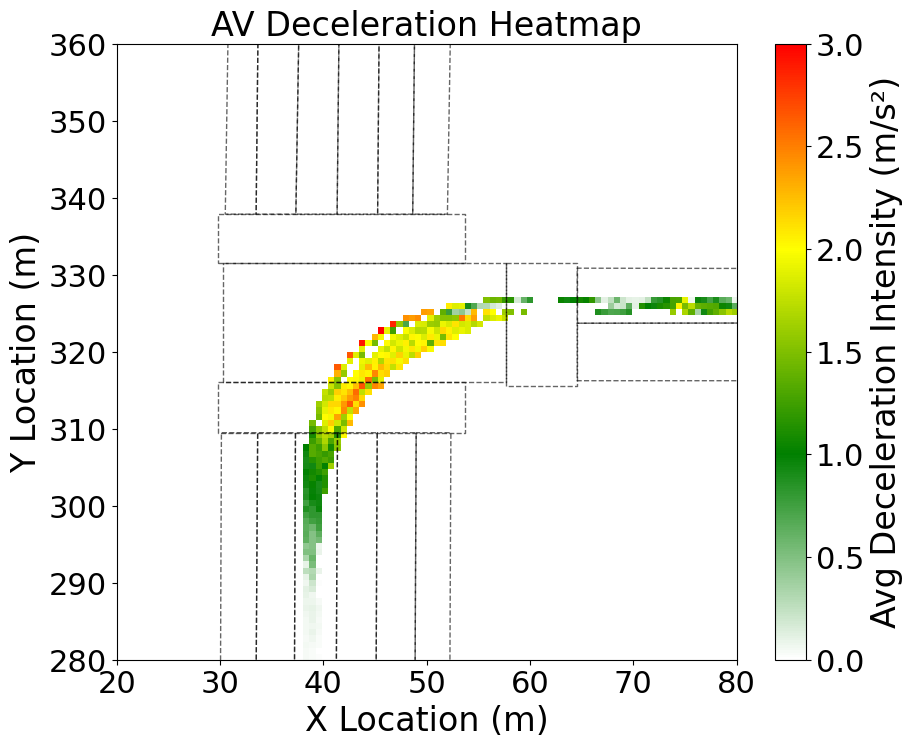

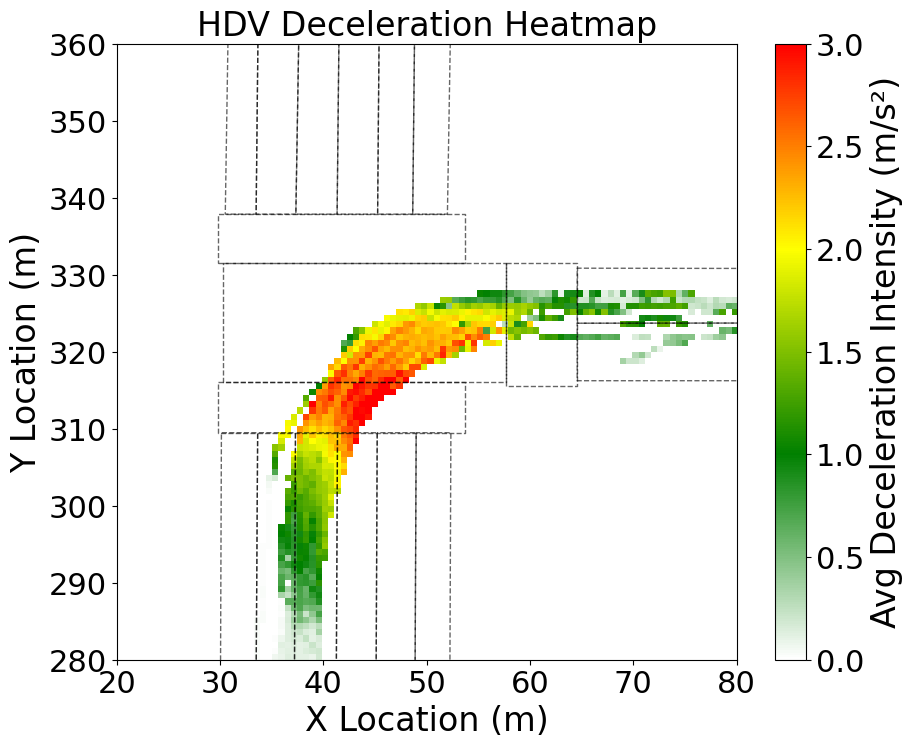

In [13]:
# Visualizing deceleration for the bottom-left intersection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Loading the full transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keeping only AVs and HDVs (types 4 and 3)
vehicles = tgsim[tgsim["type_most_common"].isin([3, 4])]

# Only agents that made the 29 → 15 left turn are of interest here
ids_in_29 = set(vehicles[vehicles["lane_kf"] == 29]["id"])
ids_in_15 = set(vehicles[vehicles["lane_kf"] == 15]["id"])
left_turn_ids = ids_in_29 & ids_in_15  # Intersection: vehicles that were in both

left_turn_data = vehicles[vehicles["id"].isin(left_turn_ids)].copy()

# Filtering to decelerating segments — if acc and velocity oppose in any direction
decel_data = left_turn_data[
    ((left_turn_data['speed_kf_x'] > 0) & (left_turn_data['acceleration_kf_x'] < 0)) |
    ((left_turn_data['speed_kf_x'] < 0) & (left_turn_data['acceleration_kf_x'] > 0)) |
    ((left_turn_data['speed_kf_y'] > 0) & (left_turn_data['acceleration_kf_y'] < 0)) |
    ((left_turn_data['speed_kf_y'] < 0) & (left_turn_data['acceleration_kf_y'] > 0))
]

# Zooming into the top-right quadrant of the intersection (where 25 to 29 happens)
decel_data = decel_data[(decel_data['xloc_kf'] < 125) & (decel_data['yloc_kf'] > 250)]

# Splitting AVs and HDVs (AV = 4, HDV = 3)
av_data = decel_data[decel_data["type_most_common"] == 4]
hdv_data = decel_data[decel_data["type_most_common"] == 3]

# Creating a nice custom colormap (white to red, passing green and yellow)
cmap = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["white", "green", "yellow", "red"])

# Plotting function with polygon overlay
def plot_heatmap(data, title, filename, polygons, acc_min=0, acc_max=3.0):
    if data.empty:
        print(f"No data for {title} — skipping.")
        return

    fig, ax = plt.subplots(figsize=(10, 8))

    # Deceleration intensity using Euclidean norm
    decel_mag = np.sqrt(data["acceleration_kf_x"]**2 + data["acceleration_kf_y"]**2)

    # Binned heatmap of total deceleration magnitude
    heatmap_sum, xedges, yedges = np.histogram2d(
        data["xloc_kf"], data["yloc_kf"],
        bins=[100, 100],
        range=[[20, 80], [280, 360]],
        weights=decel_mag
    )

    # Binned counts for averaging
    counts, _, _ = np.histogram2d(
        data["xloc_kf"], data["yloc_kf"],
        bins=[100, 100],
        range=[[20, 80], [280, 360]]
    )
    counts[counts == 0] = 1  # avoid division by zero

    # Normalized heatmap (average deceleration)
    heatmap_avg = heatmap_sum / counts

    # Plotting the heatmap
    img = ax.imshow(
        heatmap_avg.T, origin="lower",
        extent=[20, 80, 280, 360],
        cmap=cmap, aspect="auto", vmin=acc_min, vmax=acc_max
    )

    cbar = plt.colorbar(img)
    cbar.set_label("Avg Deceleration Intensity (m/s²)", fontsize=24)
    cbar.ax.tick_params(labelsize=22)

    # Overlaying polygons
    for lane_id, polygon in polygons_tr_m.items():
        if not polygon:
            continue
        polygon_closed = polygon + [polygon[0]]  # Close the loop
        x_poly, y_poly = zip(*polygon_closed)
        ax.plot(x_poly, y_poly, linestyle="--", linewidth=1, color="black", alpha=0.6)

    ax.set_xlim([20, 80])
    ax.set_ylim([280, 360])
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    ax.set_xlabel("X Location (m)", fontsize=24)
    ax.set_ylabel("Y Location (m)", fontsize=24)
    ax.set_title(title, fontsize=24)
    plt.savefig(filename, dpi=300)
    plt.show()

# Calling the updated plotting function with polygon overlay
plot_heatmap(av_data, "AV Deceleration Heatmap", "heatmap_av_left_turn.png", polygons_tr_m)
plot_heatmap(hdv_data, "HDV Deceleration Heatmap", "heatmap_hdv_left_turn.png", polygons_tr_m)


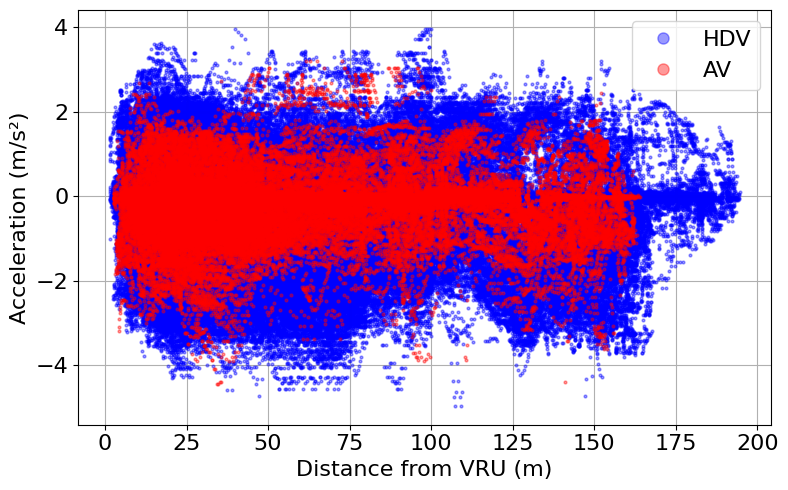

In [2]:
# This is a scatter plot for acceleration and deceleration vs ped/bike/scooter distance for all left turning AV's and HDVs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import json

# Load datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

with open("AV_Detection_Details.json", "r") as f:
    av_det = pd.DataFrame(json.load(f))

with open("HDV_Detection_Details.json", "r") as f:
    hdv_det = pd.DataFrame(json.load(f))

# Calculating speed magnitude
tgsim['speed_mag'] = np.sqrt(tgsim['speed_kf_x']**2 + tgsim['speed_kf_y']**2)

# Now creating a function for acceleration magnitude with a sign 
def acc_calc(row):
    if (np.sign(row["speed_kf_x"]) != np.sign(row["acceleration_kf_x"])) or \
       (np.sign(row["speed_kf_y"]) != np.sign(row["acceleration_kf_y"])):
        acceleration = -1 * np.sqrt(row["acceleration_kf_x"]**2 + row["acceleration_kf_y"]**2)
    else:
        acceleration = np.sqrt(row["acceleration_kf_x"]**2 + row["acceleration_kf_y"]**2)
    
    return acceleration

tgsim['acceleration'] = tgsim.apply(acc_calc, axis=1)

# Filtering for only acceleration values between -5 and 5 m/s2
tgsim = tgsim[(tgsim["acceleration"]>=-5) & (tgsim["acceleration"]<=5)]

# Filtering for only pedestrian (0), bike (1), or scooter (2) interactions
target_types = [0, 1, 2]
tgsim_filtered = tgsim[(tgsim["type_most_common"].isin(target_types)) & (tgsim['speed_mag'] > 0.2)] # filtering for type and marginal speed

# AV Interactions 
df_av = av_det.merge(tgsim, left_on=["time", "av_id"], right_on=["time", "id"], suffixes=("", "_ego"))
df_av = df_av.merge(tgsim_filtered, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("", "_target"))

av_scatter = df_av[["distance", "acceleration"]]

# HDV Interactions 
df_hdv = hdv_det.merge(tgsim, left_on=["time", "hdv_id"], right_on=["time", "id"], suffixes=("", "_ego"))
df_hdv = df_hdv.merge(tgsim_filtered, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("", "_target"))

hdv_scatter = df_hdv[["distance", "acceleration"]]

# Plotting
plt.figure(figsize=(8, 5))

# Scatter plots with transparency (alpha)
hdv_plot, = plt.plot(hdv_scatter["distance"], hdv_scatter["acceleration"],
                     'b.', markersize=4, alpha=0.4, label="HDV")
av_plot, = plt.plot(av_scatter["distance"], av_scatter["acceleration"],
                    'r.', markersize=4, alpha=0.4, label="AV")

plt.xlabel("Distance from VRU (m)", fontsize=16)
plt.ylabel("Acceleration (m/s²)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Bigger markers in the legend by adjusting 'markerscale'
plt.legend(fontsize=16, markerscale=4)  # <-- This makes markers 4x bigger in the legend

plt.grid(True)
plt.tight_layout()
plt.savefig("Acceleration_vs_Distance_AV_HDV.png", dpi=300)
plt.show()

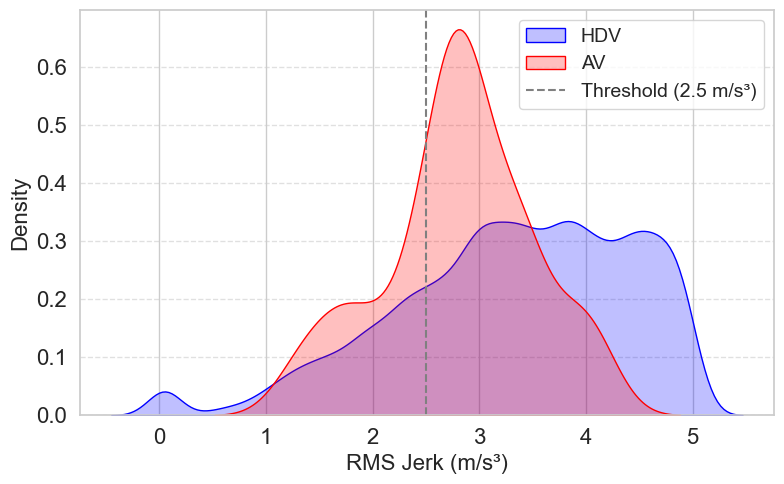

In [8]:
# RMS Jerk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the transformed dataset
jerky_df = pd.read_csv("Jerk.csv")
jerky_df = jerky_df[(jerky_df["rms_jerk"] <= 5)]






# Label vehicle types
jerky_df["Vehicle Type"] = jerky_df["type_most_common"].map({3: "HDV", 4: "AV"})
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.kdeplot(data=jerky_df[jerky_df["Vehicle Type"] == "HDV"], x="rms_jerk", label="HDV", color="blue", fill=True,  bw_adjust=0.7)
sns.kdeplot(data=jerky_df[jerky_df["Vehicle Type"] == "AV"], x="rms_jerk", label="AV", color="red", fill=True,  bw_adjust=0.7)

plt.axvline(x=2.5, color='gray', linestyle='--', label='Threshold (2.5 m/s³)')
plt.xlabel("RMS Jerk (m/s³)", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, title_fontsize=14, loc="upper right")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("RMS_Jerk_KDE.png", dpi=300)
plt.show()

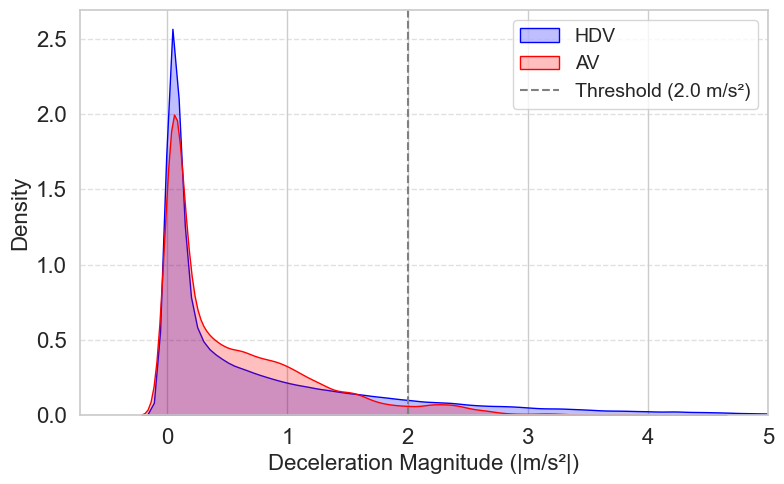

In [9]:
# Deceleration intensity

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filter to AVs and HDVs only
df = df[df["type_most_common"].isin([3, 4])].copy()
df["Vehicle Type"] = df["type_most_common"].map({3: "HDV", 4: "AV"})

decel_records = []

for agent_id, group in df.groupby("id"):
    group = group.sort_values("time").reset_index(drop=True)

    speed = np.sqrt(group["speed_kf_x"]**2 + group["speed_kf_y"]**2).values
    acc = np.sqrt(group["acceleration_kf_x"]**2 + group["acceleration_kf_y"]**2).values
    vehicle_type = group["Vehicle Type"].iloc[0]

    for i in range(len(speed) - 3):
        if speed[i] > speed[i+1] > speed[i+2]:
            decel_val = abs(acc[i+2])
            if decel_val <= 10:  # filter out extreme values
                decel_records.append({
                    "id": agent_id,
                    "Vehicle Type": vehicle_type,
                    "decel_magnitude": decel_val
                })

# Create DataFrame
decel_plot_df = pd.DataFrame(decel_records)

# KDE Plot
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=decel_plot_df[decel_plot_df["Vehicle Type"] == "HDV"],
    x="decel_magnitude",
    label="HDV",
    color="blue",
    fill=True,
    bw_adjust=0.7
)

sns.kdeplot(
    data=decel_plot_df[decel_plot_df["Vehicle Type"] == "AV"],
    x="decel_magnitude",
    label="AV",
    color="red",
    fill=True,
    bw_adjust=0.7
)

plt.axvline(x=2.0, color='gray', linestyle='--', label='Threshold (2.0 m/s²)')

plt.xlabel("Deceleration Magnitude (|m/s²|)", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(right=5)
plt.legend(fontsize=14, title_fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Deceleration_Magnitude_KDE_Plot.png", dpi=300)
plt.show()


C:\Users\msela\AppData\Local\Temp\ipykernel_25260\4153460438.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


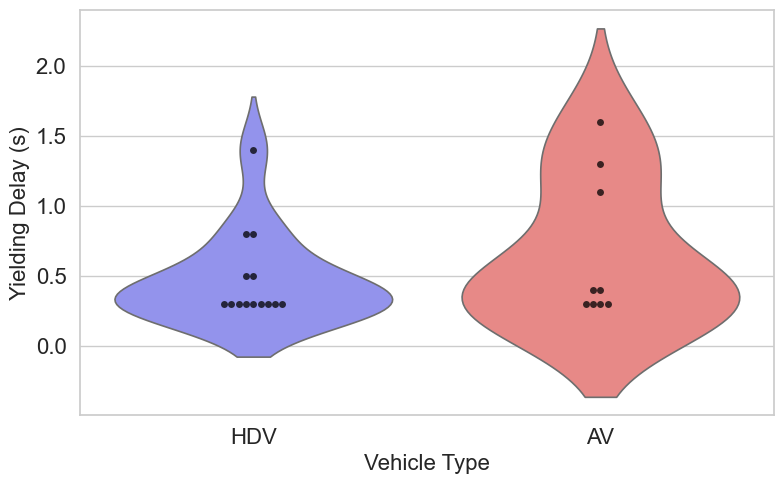

In [41]:
# Yielding delay

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare vehicle type labels
delay_df = pd.read_csv("Yielding_Distance_Results.csv")
delay_df["veh_label"] = delay_df["veh_type"].map({3: "HDV", 4: "AV"})

# Plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Color palette to match your visuals
custom_palette = {
    "HDV": "#8484FB",  # Bright blue
    "AV": "#F77977"    # Light red
}

# Violin plot
sns.violinplot(
    data=delay_df,
    x="veh_label",
    y="yielding_delay_s",
    inner=None,
    linewidth=1.2,
    palette=custom_palette
)

# Swarm plot for individual points
sns.swarmplot(
    data=delay_df,
    x="veh_label",
    y="yielding_delay_s",
    color='black',
    size=5,
    alpha=0.75
)

# Axes and legend styling
plt.ylabel("Yielding Delay (s)", fontsize=16)
plt.xlabel("Vehicle Type", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("Yielding_Delay_By_Type.png", dpi=300)
plt.show()


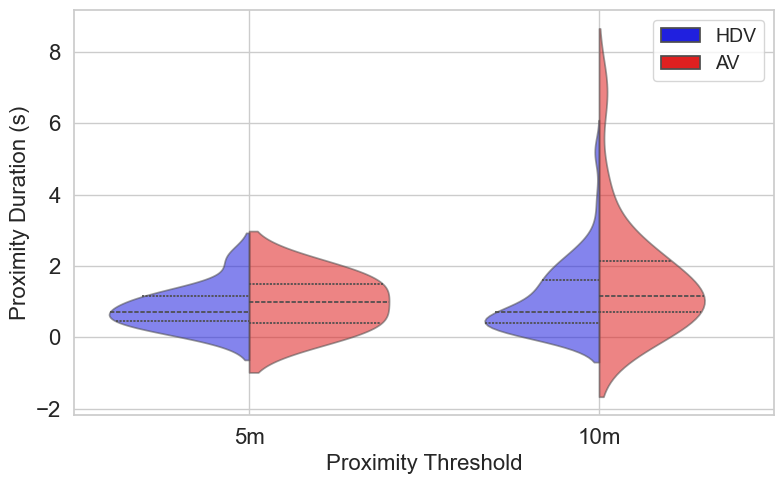

In [40]:
# Proximity time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the proximity datasets
prox10 = pd.read_csv("Proximity_Results_10m.csv")
prox5 = pd.read_csv("Proximity_Results_5m.csv")

# Tag threshold type
prox10["threshold"] = "10m"
prox5["threshold"] = "5m"

# Combine datasets
prox_df = pd.concat([prox10, prox5], ignore_index=True)

# Tag vehicle types (4 = AV, 3 = HDV)
prox_df["vehicle"] = prox_df["veh_type"].map({4: "AV", 3: "HDV"})

# Ensure correct ordering
prox_df["threshold"] = pd.Categorical(prox_df["threshold"], categories=["5m", "10m"])
prox_df["vehicle"] = pd.Categorical(prox_df["vehicle"], categories=["HDV", "AV"])

# Set style
sns.set(style="whitegrid")

# --- VIOLIN PLOT ---
plt.figure(figsize=(8, 5))

custom_palette = {
    "AV": "red",   # red
    "HDV": "blue"   # blue
}

ax = sns.violinplot(
    data=prox_df,
    x="threshold",
    y="proximity_duration_s",
    hue="vehicle",
    split=True,
    inner="quart",
    palette=custom_palette
)

# Transparency
for violin in ax.collections:
    violin.set_alpha(0.55)

# Axis and label formatting
plt.xlabel("Proximity Threshold", fontsize=16)
plt.ylabel("Proximity Duration (s)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, title_fontsize=14, loc="upper right")
plt.grid(axis="y")
ax.grid(True)

plt.tight_layout()
plt.savefig("Proximity_Violin_Plot.png", dpi=300)
plt.show()


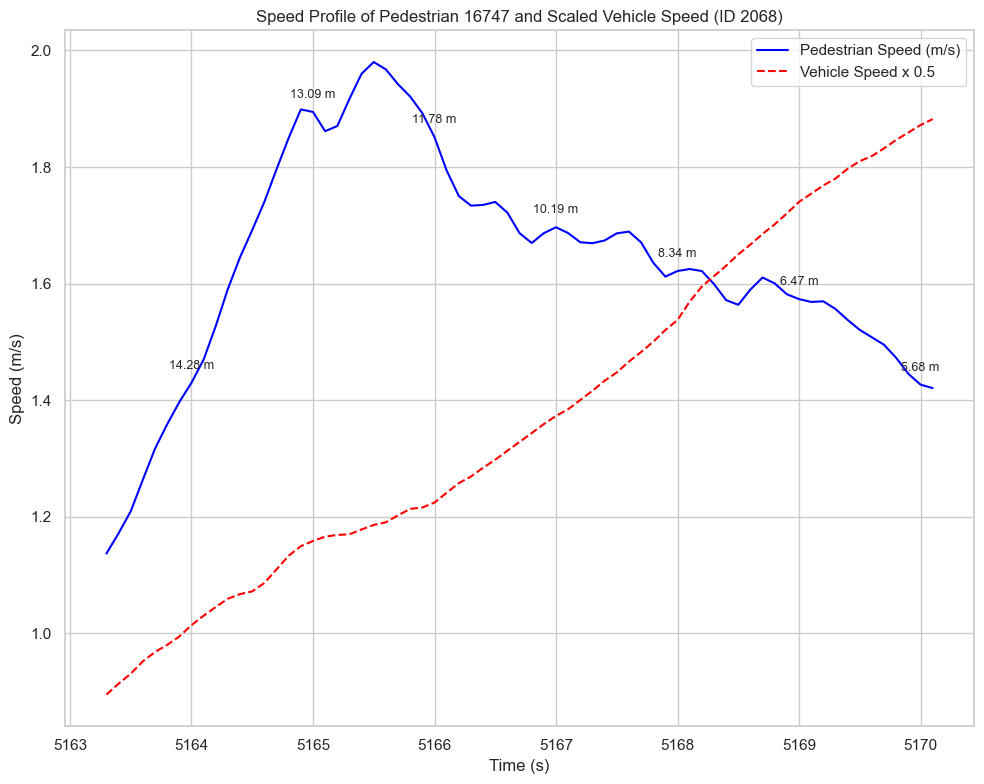

In [155]:
# Speed profiles for a hesitation event - AV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Set parameters
ped_id = 16747
agent_id = 2068
start_time = 5150
end_time = 5180

# Filter data
ped_df = df[(df["id"] == ped_id) & (df["time"] >= start_time) & (df["time"] <= end_time)].copy()
agent_df = df[(df["id"] == agent_id) & (df["time"].isin(ped_df["time"]))].copy()

# Sort and reset index
ped_df.sort_values("time", inplace=True)
agent_df.set_index("time", inplace=True)
ped_df.set_index("time", inplace=True)

# Compute pedestrian and agent speed
ped_df["speed_mag"] = np.sqrt(ped_df["speed_kf_x"]**2 + ped_df["speed_kf_y"]**2)
ped_df["veh_speed_scaled"] = np.sqrt(agent_df["speed_kf_x"]**2 + agent_df["speed_kf_y"]**2) * 0.5

# Compute distance to agent
dx = ped_df["xloc_kf"] - agent_df["xloc_kf"]
dy = ped_df["yloc_kf"] - agent_df["yloc_kf"]
ped_df["distance_to_LT_agent"] = np.sqrt(dx**2 + dy**2)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ped_df.index, ped_df["speed_mag"], label="Pedestrian Speed (m/s)", color="blue")
ax.plot(ped_df.index, ped_df["veh_speed_scaled"], label="Vehicle Speed x 0.5", color="red", linestyle="--")

# Add distance labels every 1 seconds
for t in range(start_time + 1, end_time):
    if t in ped_df.index:
        d = ped_df.loc[t, "distance_to_LT_agent"]
        s = ped_df.loc[t, "speed_mag"]
        ax.annotate(f"{d:.2f} m", (t, s), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Labels and styling
ax.set_title(f"Speed Profile of Pedestrian {ped_id} and Scaled Vehicle Speed (ID {agent_id})")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Speed (m/s)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.savefig("Ped_Hesitation_AV.png", dpi=300)
plt.show()


C:\Users\msela\AppData\Local\Temp\ipykernel_14448\442175111.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


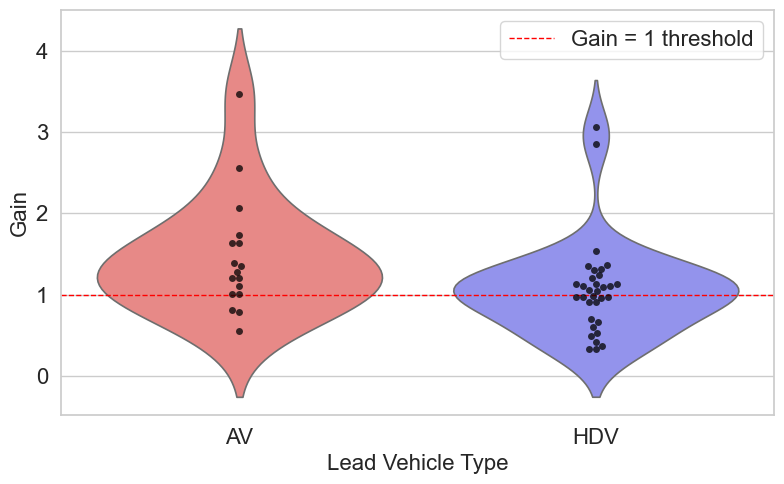

In [7]:
# String Stability (Gain)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading datasets
gain_df_av = pd.read_csv("AV_String_Stability_Results.csv")
gain_df_hdv = pd.read_csv("HDV_String_Stability_Results.csv")

# Defining lead types
gain_df_av["lead_type"] = "AV"
gain_df_hdv["lead_type"] = "HDV"

# Combining
full_gain_df = pd.concat([gain_df_av, gain_df_hdv], ignore_index=True)

# Filtering to only position 1 followers
df_pos1 = full_gain_df[full_gain_df["platoon_pos"] == 1].copy()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

# Improved vibrant colors
custom_palette = {
    "HDV": "#8484FB",  # Bluer, slightly brighter
    "AV": "#F77977"    # Shinier, milkier red
}


# Violin plot with updated colors
sns.violinplot(
    data=df_pos1,
    x="lead_type",
    y="gain",
    inner=None,
    linewidth=1.2,
    palette=custom_palette
)

# Swarm plot (black points)
sns.swarmplot(
    data=df_pos1,
    x="lead_type",
    y="gain",
    color='black',
    size=5,
    alpha=0.75
)

# Threshold line
plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label='Gain = 1 threshold')

# Labels and legend
plt.ylabel("Gain", fontsize=16)
plt.xlabel("Lead Vehicle Type", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.savefig("First_Follower_Gain_by_Lead_Type.png", dpi=300)
plt.show()


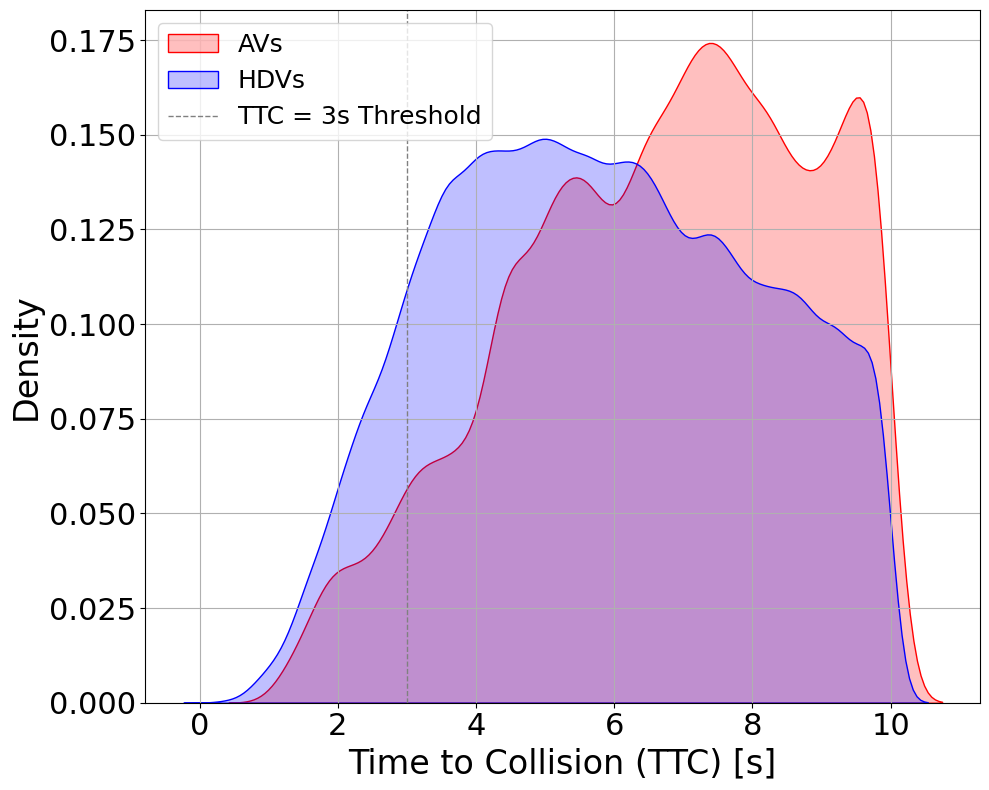

In [16]:
# TTC for VRU interactions only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load TTC datasets
av_ttc = pd.read_csv("AV_TTC_Analysis.csv")
hdv_ttc = pd.read_csv("HDV_TTC_Analysis.csv")
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Merge to get type_most_common of agent
av_ttc = av_ttc.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])
hdv_ttc = hdv_ttc.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])

# Filter for VRUs only: pedestrians (0), bicycles (1), scooters (2)
vru_types = [0, 1, 2]
av_ttc = av_ttc[av_ttc["type_most_common"].isin(vru_types)]
hdv_ttc = hdv_ttc[hdv_ttc["type_most_common"].isin(vru_types)]

# Filter out infinite or very large TTCs to focus on risk zone
ttc_threshold = 10  # seconds
av_ttc = av_ttc[np.isfinite(av_ttc["TTC"]) & (av_ttc["TTC"] <= ttc_threshold)]
hdv_ttc = hdv_ttc[np.isfinite(hdv_ttc["TTC"]) & (hdv_ttc["TTC"] <= ttc_threshold)]

# Create the KDE plot
plt.figure(figsize=(10, 8))
sns.kdeplot(av_ttc["TTC"], label="AVs", color="red", fill=True, bw_adjust=0.7)
sns.kdeplot(hdv_ttc["TTC"], label="HDVs", color="blue", fill=True, bw_adjust=0.7)

# Add threshold line (e.g., TTC = 3 seconds)
plt.axvline(3, color='gray', linestyle='--', linewidth=1, label="TTC = 3s Threshold")

# Labels and legend
plt.xlabel("Time to Collision (TTC) [s]", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=18, loc="upper left")
plt.grid(True)
plt.tight_layout()

# Save figure
plt.savefig("TTC_Distribution_VRU_Only.png", dpi=300)
plt.show()


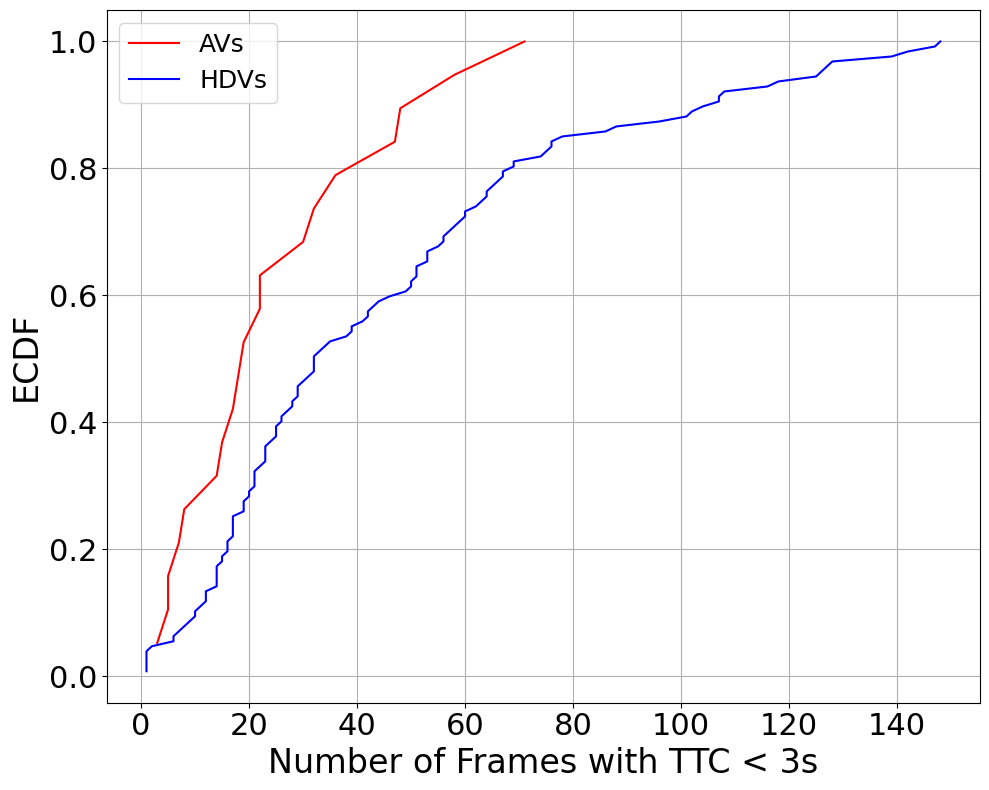

In [17]:
# ECDFs for TTCs less than 3 s

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
av_ttc = pd.read_csv("AV_TTC_Analysis.csv")
hdv_ttc = pd.read_csv("HDV_TTC_Analysis.csv")

# Get VRU IDs
vru_ids = tgsim[tgsim["type_most_common"].isin([0, 1, 2])]["id"].unique()

# Filter TTC datasets for VRU interactions only
av_vru = av_ttc[av_ttc["agent_id"].isin(vru_ids) & np.isfinite(av_ttc["TTC"])]
hdv_vru = hdv_ttc[hdv_ttc["agent_id"].isin(vru_ids) & np.isfinite(hdv_ttc["TTC"])]

# Cumulative Risk Metric (Frames with TTC < 3s)

# Counting number of 0.1s frames with TTC < 3s per vehicle
av_risk = av_vru[av_vru["TTC"] < 3].groupby("av_id").size()
hdv_risk = hdv_vru[hdv_vru["TTC"] < 3].groupby("hdv_id").size()

# ECDF plot
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_av, y_av = ecdf(av_risk)
x_hdv, y_hdv = ecdf(hdv_risk)

plt.figure(figsize=(10, 8))
plt.plot(x_av, y_av, label="AVs", color="red")
plt.plot(x_hdv, y_hdv, label="HDVs", color="blue")
plt.xlabel("Number of Frames with TTC < 3s", fontsize=24)
plt.ylabel("ECDF", fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=18, loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.savefig("ECDF_TTC_Under_3_VRUs.png", dpi=300)
plt.show()

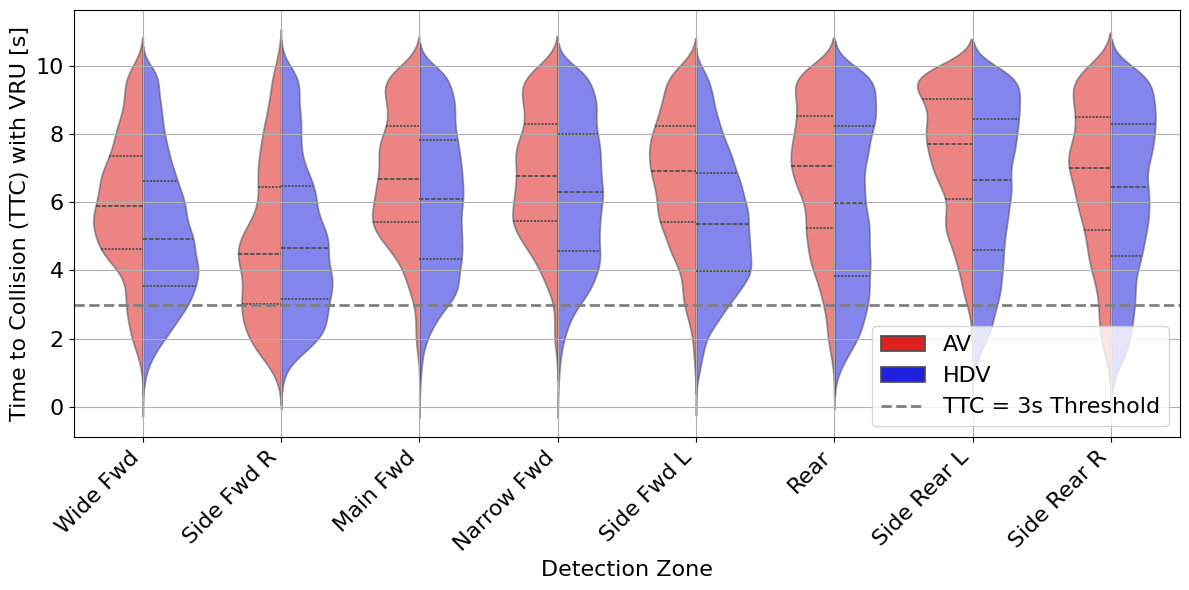

In [4]:
# TTC in each detection zone. 
# Note: since this is a left turn, front zones seem to be the only relevant ones

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading TTC and original datasets
av = pd.read_csv("AV_TTC_Analysis.csv")
hdv = pd.read_csv("HDV_TTC_Analysis.csv")
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Merging and filtering for VRUs
vru_types = [0, 1, 2]
av = av.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])
hdv = hdv.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])
av = av[av["type_most_common"].isin(vru_types)]
hdv = hdv[hdv["type_most_common"].isin(vru_types)]

# Filtering out infinite or large TTCs
av = av[np.isfinite(av["TTC"]) & (av["TTC"] <= 10)]
hdv = hdv[np.isfinite(hdv["TTC"]) & (hdv["TTC"] <= 10)]

# Ensuring zones are treated as lists
av["zones"] = av["zones"].apply(lambda z: eval(z) if isinstance(z, str) else z)
hdv["zones"] = hdv["zones"].apply(lambda z: eval(z) if isinstance(z, str) else z)

# Exploding so that each zone gets its own row. this is because we want zones to be plotted separately rather than combincations of zones
av = av.explode("zones")
hdv = hdv.explode("zones")

# Assigning vehicle type. This helps in plotting. 
av["vehicle_type"] = "AV"
hdv["vehicle_type"] = "HDV"

# Combining datasets
df_all = pd.concat([av[["TTC", "zones", "vehicle_type"]], hdv[["TTC", "zones", "vehicle_type"]]])

# Dropping any NaNs that might sneak in
df_all = df_all.dropna(subset=["zones", "TTC"])

# Plotting our violins
custom_palette = {"AV": "red", "HDV": "blue"}

plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=df_all,
    x="zones",
    y="TTC",
    hue="vehicle_type",
    split=True,
    inner="quartile",
    palette=custom_palette
)

for violin in ax.collections:
    violin.set_alpha(0.55)  # Set transparency to 60%

plt.axhline(3, color="gray", linewidth=2, linestyle="--", label="TTC = 3s Threshold")
plt.ylabel("Time to Collision (TTC) with VRU [s]", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.xlabel("Detection Zone", fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("TTC_Violin_By_Zone_Cleaned.png", dpi=300)
plt.show()


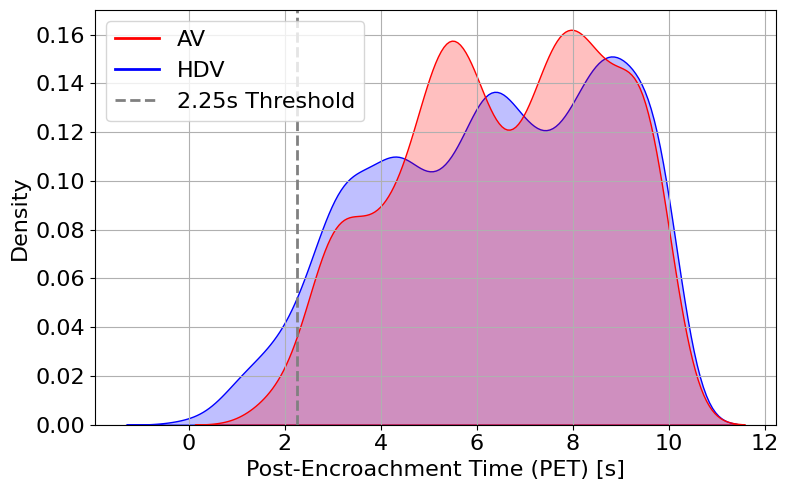

In [1]:
# PET

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load PET datasets
av_pet = pd.read_csv("AV_PET_Analysis_5m.csv")
hdv_pet = pd.read_csv("HDV_PET_Analysis_5m.csv")

# Add vehicle type column
av_pet["vehicle_type"] = "AV"
hdv_pet["vehicle_type"] = "HDV"

# Combine datasets
df_all = pd.concat([av_pet[["PET", "vehicle_type"]], hdv_pet[["PET", "vehicle_type"]]])

# Filter PET values to a reasonable range (e.g., 0 to 10 seconds)
df_all = df_all[(df_all["PET"] >= 0) & (df_all["PET"] <= 10)]

# Plot KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_all, x="PET", hue="vehicle_type", common_norm=False, fill=True, bw_adjust=0.7, palette={"AV": "red", "HDV": "blue"})

# Threshold line
plt.axvline(2.25, color='gray', linestyle='--', linewidth=2)

# Custom legend handles
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='AV'),
    Line2D([0], [0], color='blue', lw=2, label='HDV'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='2.25s Threshold')
]

plt.xlabel("Post-Encroachment Time (PET) [s]", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(handles=legend_elements, fontsize=16, loc="upper left")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("PET_Distribution_AV_vs_HDV.png", dpi=300)
plt.show()


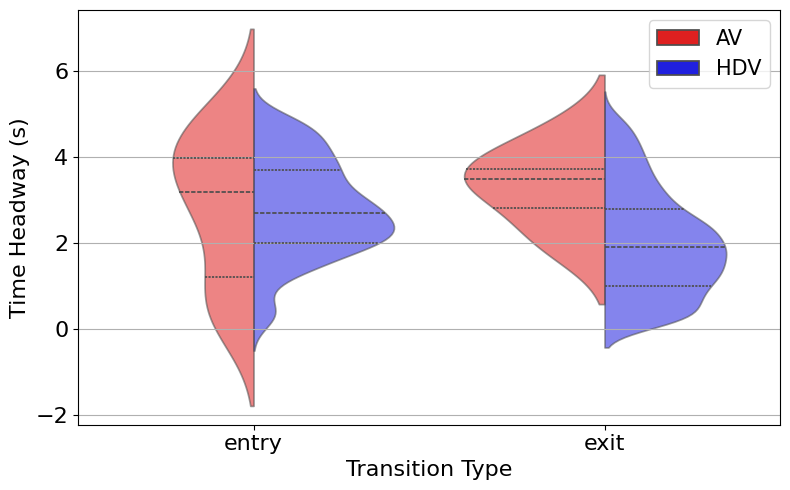

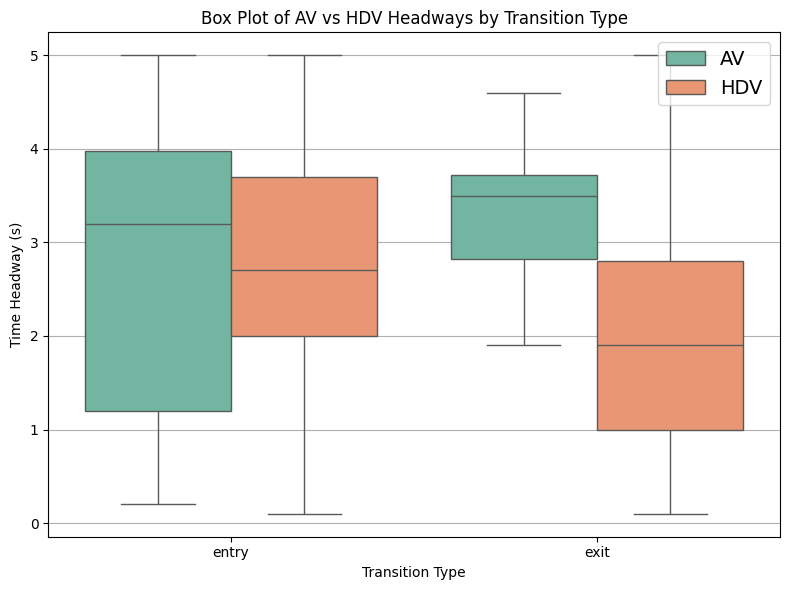

In [6]:
# Time headway

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and merge your headway data
av_df = pd.read_csv("AV_Intersection_Headways.csv")
hdv_df = pd.read_csv("HDV_Intersection_Headways.csv")

# Tag vehicle types
av_df["vehicle"] = "AV"
hdv_df["vehicle"] = "HDV"

# Combine
df = pd.concat([av_df, hdv_df], ignore_index=True)

# Add transition type
entry_pairs = [(25, 36), (29, 41), (15, 46), (34, 45)]
exit_pairs = [(2, 37), (1, 40), (3, 48), (4, 42)]

df["transition_type"] = df.apply(
    lambda row: "entry" if (row["source_lane"], row["target_lane"]) in entry_pairs
    else "exit" if (row["source_lane"], row["target_lane"]) in exit_pairs
    else "other",
    axis=1
)

# Filter to headways ≤ 5 seconds and valid transitions
df = df[(df["time_headway"] <= 5) & (df["transition_type"].isin(["entry", "exit"]))]

# --- VIOLIN PLOT: split by vehicle within each transition_type ---

custom_palette = {"AV": "red", "HDV": "blue"}

plt.figure(figsize=(8, 5))
ax = sns.violinplot(
    data=df,
    x="transition_type",
    y="time_headway",
    hue="vehicle",
    split=True,
    inner="quart",
    palette=custom_palette
)

for violin in ax.collections:
    violin.set_alpha(0.55)  # Set transparency to 60%



plt.xlabel("Transition Type", fontsize=16)
plt.ylabel("Time Headway (s)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=15, loc="upper right")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("Violin_AV_HDV_Headways_by_Transition.png")
plt.show()

# --- BOX PLOT: grouped by transition and vehicle ---
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="transition_type",
    y="time_headway",
    hue="vehicle",
    palette="Set2"
)
plt.title("Box Plot of AV vs HDV Headways by Transition Type")
plt.xlabel("Transition Type")
plt.ylabel("Time Headway (s)")
plt.legend(fontsize=14, loc="upper right")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("Box_AV_HDV_Headways_by_Transition.png")
plt.show()
